In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append("../")
from src import soporte_preprocesamiento as sp
from src import soporte_nulos as sn
from src import soporte_encoding as se
from src import soporte_outliers as so
from src import soporte_ajuste as sa
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames
from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler, RobustScaler
import seaborn as sns

In [2]:
df = pd.read_csv("../datos/toledo_interesante.csv", index_col=0)

In [3]:
sp.exploracion_datos(df)

El número de filas es 62 y el número de columnas es 28

----------

En este conjunto de datos tenemos 3 valores duplicados

----------

Los columnas con valores nulos y sus porcentajes son: 


hasVideo          6.45
status            6.45
newDevelopment    6.45
priceByArea       6.45
detailedType      6.45
suggestedTexts    6.45
hasPlan           6.45
has360            6.45
hasStaging        6.45
floor            19.35
hasLift          16.13
parkingSpace     38.71
dtype: float64


----------

Las principales estadísticas de las variables númericas son:


,count,mean,std,min,25%,50%,75%,max
propertyCode,62.00,"92,221,374.45","17,495,193.60","30,863,032.00","95,456,285.50","98,464,516.00","98,883,249.25","98,924,864.00"
price,62.00,572.74,109.65,340.00,496.25,550.00,650.00,750.00
size,62.00,103.03,59.48,50.00,76.00,87.00,100.00,371.00
rooms,62.00,2.29,0.91,1.00,2.00,2.00,3.00,6.00
bathrooms,62.00,1.60,0.61,1.00,1.00,2.00,2.00,3.00
distance,62.00,"40,872.63","9,186.94","31,278.00","33,253.00","38,378.50","46,744.25","59,351.00"
priceByArea,58.00,6.26,1.92,1.00,5.00,7.00,7.00,11.00



----------

Las principales estadísticas de las variables categóricas son:


,count,unique,top,freq
propertyType,62,5,flat,50
operation,62,1,rent,62
address,62,52,El Quiñón,4
province,62,1,Toledo,62
municipality,62,24,Seseña,14
country,62,1,es,62
latitude,62,59,40.009.603,2
longitude,62,59,-39.515.398,2
hasVideo,58,3,False,44
status,58,1,good,58



----------

Las características principales del dataframe son:
<class 'pandas.core.frame.DataFrame'>
Index: 62 entries, 0 to 61
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   propertyCode    62 non-null     int64  
 1   price           62 non-null     float64
 2   propertyType    62 non-null     object 
 3   operation       62 non-null     object 
 4   size            62 non-null     float64
 5   exterior        62 non-null     bool   
 6   rooms           62 non-null     int64  
 7   bathrooms       62 non-null     int64  
 8   address         62 non-null     object 
 9   province        62 non-null     object 
 10  municipality    62 non-null     object 
 11  country         62 non-null     object 
 12  latitude        62 non-null     object 
 13  longitude       62 non-null     object 
 14  showAddress     62 non-null     bool   
 15  distance        62 non-null     int64  
 16  hasVideo        58 non-

None

### Podemos observar que las siguientes columnas, no deben incluirse en el analisis, bien por que son columnas específicas del anuncio o por que es una columna la cual no aporta valor al análisis.  
Las columnas son:
- `properyCode`  

- `latitude`  

- `longitude`
- `hasplan`
- `has360`
- `externalReference`


In [4]:
columnas_no_deseadas = ["latitude", "longitude", "hasPlan", "propertyCode", "has360",  "hasVideo", "suggestedTexts"]

df_filtrado_toledo = df.drop(columns=columnas_no_deseadas)

### Eliminamos los duplicados

In [5]:
df_filtrado_toledo.drop_duplicates(inplace=True)

In [6]:
df_filtrado_toledo.duplicated().sum()

0

### Identificamos y Gestionamos Nulos

In [7]:
GestorNulos = sn.GestionNulos(df_filtrado_toledo)

#### CATEGÓRICAS

In [8]:
GestorNulos.mostrar_distribucion_categoricas()

La distribución de las categorías para la columna STATUS


status
good   1.00
Name: proportion, dtype: float64

........................
La distribución de las categorías para la columna NEWDEVELOPMENT


newDevelopment
False   0.91
0.0     0.09
Name: proportion, dtype: float64

........................
La distribución de las categorías para la columna DETAILEDTYPE


detailedType
{'typology': 'flat'}                                          0.80
{'typology': 'flat', 'subTypology': 'penthouse'}              0.05
{'typology': 'chalet', 'subTypology': 'terracedHouse'}        0.05
{'typology': 'flat', 'subTypology': 'duplex'}                 0.04
{'typology': 'chalet', 'subTypology': 'independantHouse'}     0.02
{'typology': 'chalet', 'subTypology': 'semidetachedHouse'}    0.02
{'typology': 'countryHouse', 'subTypology': 'casaDePueblo'}   0.02
Name: proportion, dtype: float64

........................
La distribución de las categorías para la columna HASSTAGING


hasStaging
False   0.91
0.0     0.09
Name: proportion, dtype: float64

........................
La distribución de las categorías para la columna FLOOR


floor
1    0.38
2    0.30
bj   0.11
3    0.09
4    0.04
6    0.04
8    0.02
5    0.02
Name: proportion, dtype: float64

........................
La distribución de las categorías para la columna HASLIFT


hasLift
True    0.69
False   0.29
1.0     0.02
Name: proportion, dtype: float64

........................
La distribución de las categorías para la columna PARKINGSPACE


parkingSpace
{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': True}   1.00
Name: proportion, dtype: float64

........................


### Tras el analisis hemos decidido sustituir los nulos en cada columna por el siguiente método:
- `newDevelopment` -> 0.0 por False  

- `detailedType` -> podemos ver que ocurre igual que en madrid, por lo tanto excluimos la olumna de nuestro análisis
- ``hasStaging`` -> 0.0 por False
- `hasLift` -> 1.0 por True
- `parkingSpace` -> 1.0 por la True


In [9]:
lista_moda = ["newDevelopment", "hasStaging", "hasLift", "parkingSpace"]
lista_nueva_cat = ["floor"]

In [10]:
df_filtrado_toledo['hasStaging'] = df_filtrado_toledo['hasStaging'].replace(0.0, np.nan)
df_filtrado_toledo['newDevelopment'] = df_filtrado_toledo['newDevelopment'].replace({0.0: np.nan})
df_filtrado_toledo['hasLift'] = df_filtrado_toledo['hasLift'].replace({1.0: True})
df_filtrado_toledo['parkingSpace'] = df_filtrado_toledo['parkingSpace'].replace({1.0: True})

In [11]:
GestorNulos.imputar_nulos_categoricas(lista_moda, lista_nueva_cat)

,price,propertyType,operation,size,exterior,rooms,bathrooms,address,province,municipality,country,showAddress,distance,status,newDevelopment,priceByArea,detailedType,hasStaging,floor,hasLift,parkingSpace
0,550.00,chalet,rent,371.00,False,6,3,Numancia de la Sagra,Toledo,Numancia de la Sagra,es,False,40116,good,0.0,1.00,"{'typology': 'chalet', 'subTypology': 'indepen...",0.0,Unknown,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
1,450.00,flat,rent,89.00,False,2,1,Calle Arroyo,Toledo,Recas,es,False,47186,good,0.0,5.00,{'typology': 'flat'},0.0,2,1.0,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
2,450.00,flat,rent,60.00,True,2,1,Calle Arena,Toledo,Cedillo del Condado,es,False,38237,good,0.0,8.00,{'typology': 'flat'},0.0,1,False,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
3,550.00,flat,rent,90.00,True,3,1,El Viso de San Juan,Toledo,El Viso de San Juan,es,False,35627,good,0.0,6.00,{'typology': 'flat'},0.0,2,False,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
4,400.00,penthouse,rent,70.00,True,2,1,Camarena,Toledo,Camarena,es,False,50710,good,0.0,6.00,"{'typology': 'flat', 'subTypology': 'penthouse'}",0.0,2,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
5,750.00,flat,rent,95.00,True,3,2,"julian sanz del rio, 2",Toledo,Illescas,es,True,34444,NaN,False,NaN,NaN,False,Unknown,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
6,730.00,flat,rent,98.00,True,3,2,Calle Lavadero,Toledo,Seseña,es,False,35011,good,False,7.00,{'typology': 'flat'},False,2,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
7,530.00,flat,rent,50.00,True,2,1,Calle VALLADOLID,Toledo,Casarrubios del Monte,es,False,36223,good,False,11.00,{'typology': 'flat'},False,1,False,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
8,650.00,flat,rent,70.00,True,2,1,jerez,Toledo,Calypo Fado,es,False,35607,good,False,9.00,{'typology': 'flat'},False,1,False,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
9,650.00,flat,rent,70.00,True,2,1,jerez,Toledo,Calypo Fado,es,False,36358,good,False,9.00,{'typology': 'flat'},False,1,False,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."


In [12]:
GestorNulos.calcular_porcentaje_nulos()

status         6.78
priceByArea    6.78
detailedType   6.78
dtype: float64

In [13]:
df_filtrado_toledo.drop("detailedType", axis=1, inplace=True)

### Numéricas

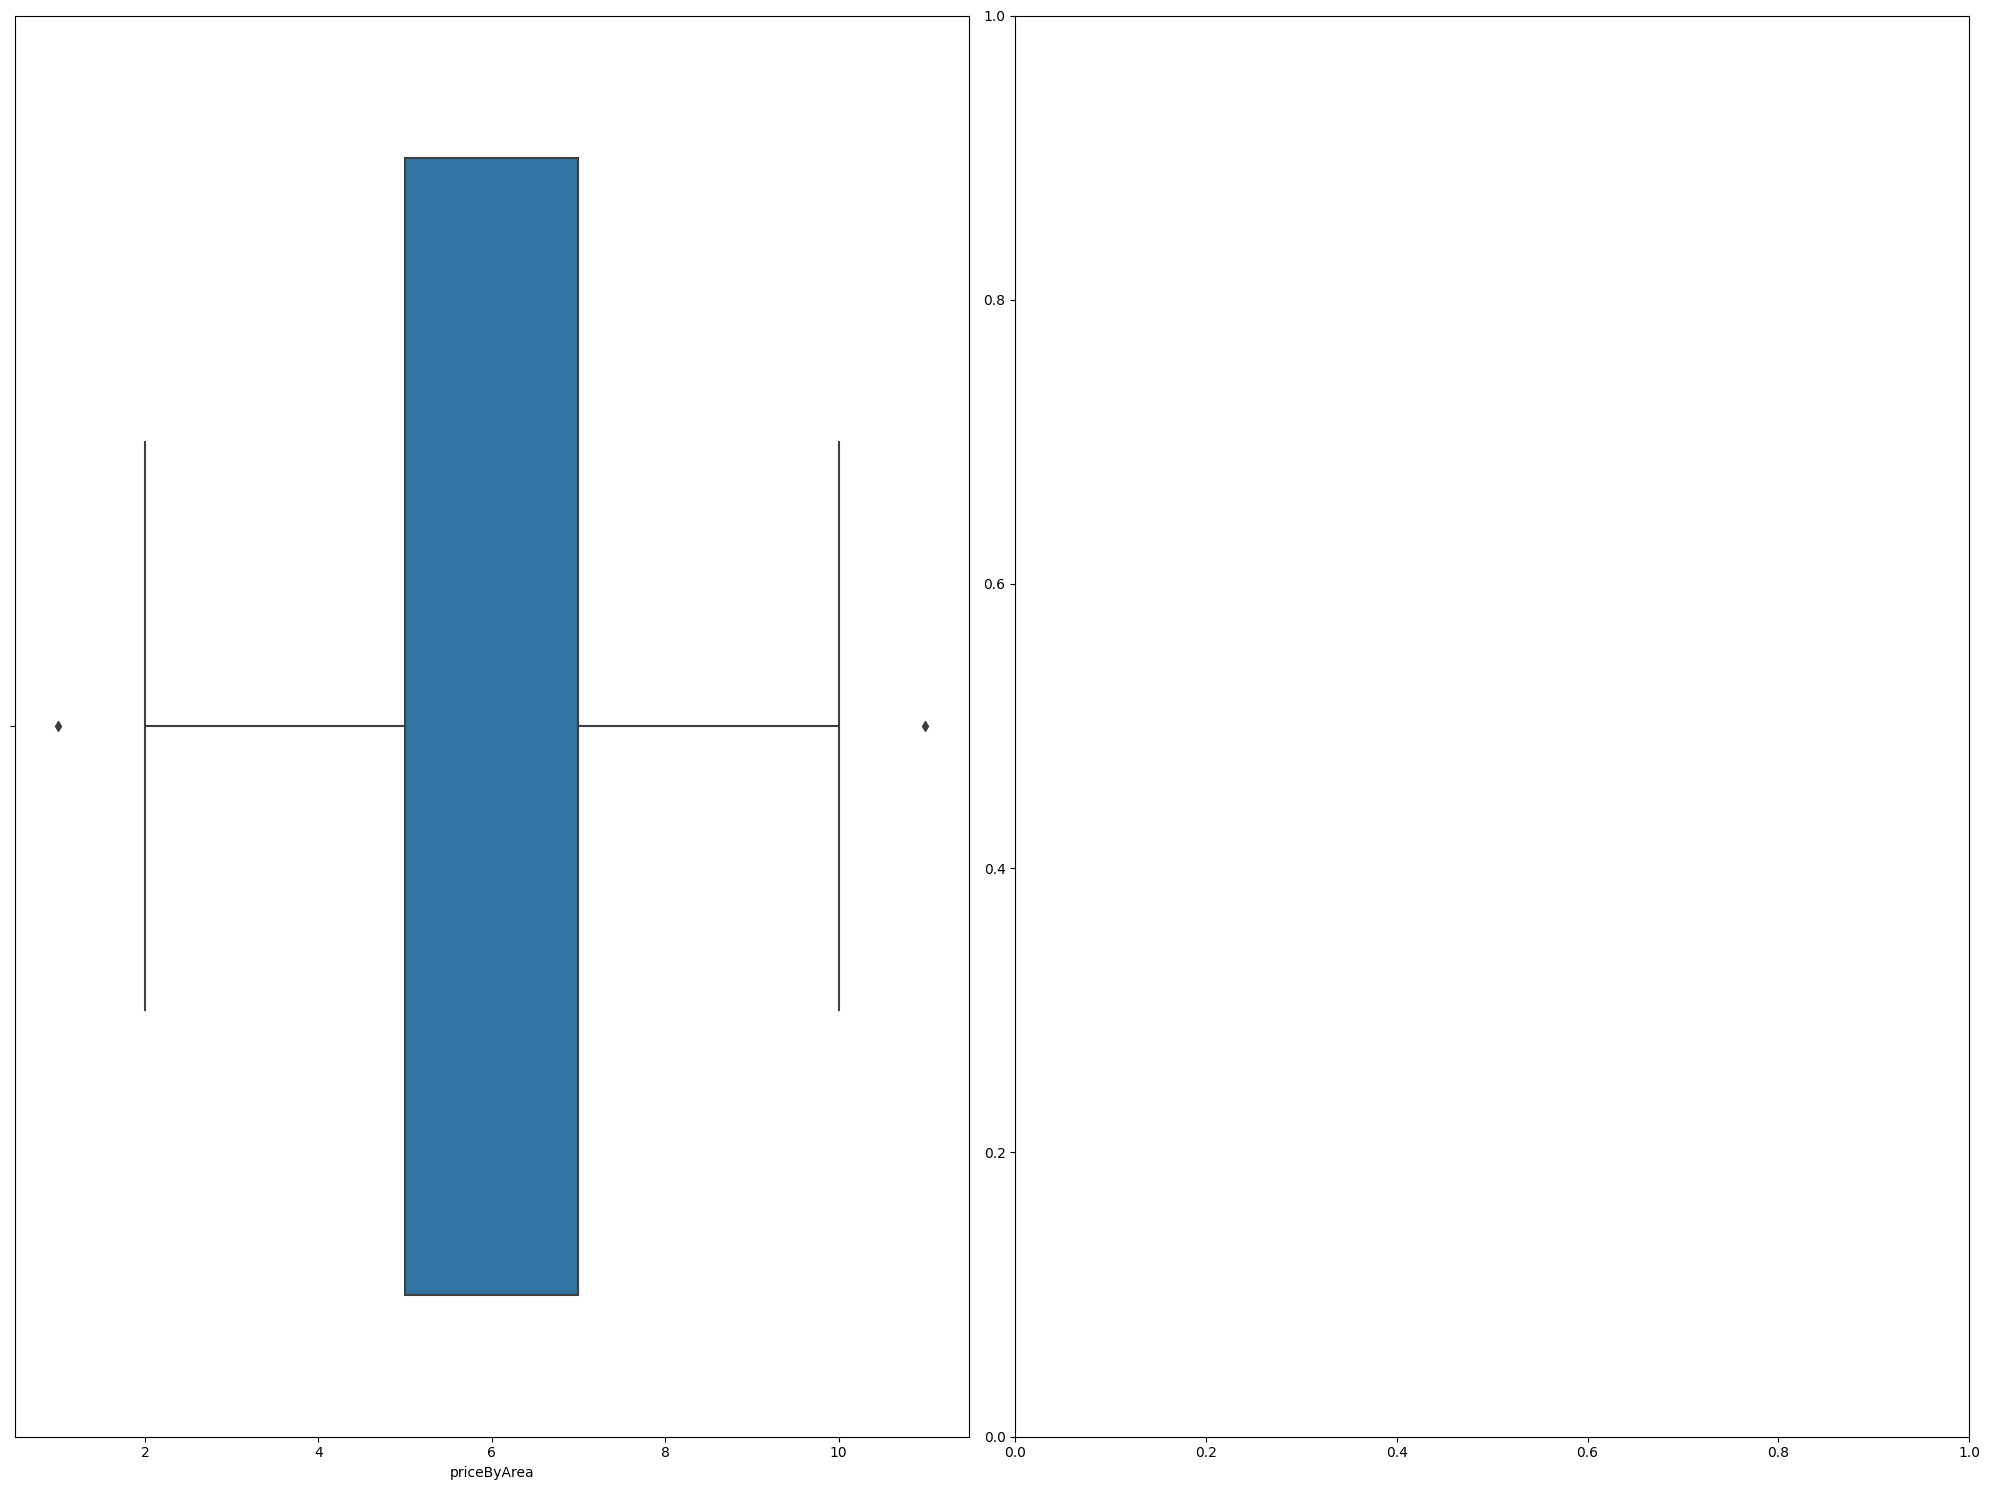

In [14]:
GestorNulos.identificar_nulos_numericas()

In [15]:
porcentaje_de_nulos1 = (df_filtrado_toledo["priceByArea"].isnull().sum() / df_filtrado_toledo["priceByArea"].shape[0]) * 100
porcentaje_de_nulos1

6.779661016949152

In [16]:
columnas_a_tratar = ["priceByArea"]
df_filtrado_toledo = GestorNulos.imputar_knn(columnas_a_tratar, numero_de_vecinos= 352 )
df_filtrado_toledo = GestorNulos.imputar_imputer(columnas_a_tratar)

In [17]:
GestorNulos.comparar_metodos()

,priceByArea,priceByArea_iterative,priceByArea_knn
count,55.00,59.00,59.00
mean,6.29,6.29,6.29
std,1.94,1.87,1.87
min,1.00,1.00,1.00
25%,5.00,5.00,5.00
50%,7.00,6.29,6.29
75%,7.00,7.00,7.00
max,11.00,11.00,11.00


In [18]:
columnas_a_eliminar = ["priceByArea", "priceByArea_iterative"]
GestorNulos.columnas_eliminar(columnas_a_eliminar)

# Encoding

In [19]:
lista_col_categ = df_filtrado_toledo.select_dtypes(include="O").columns.tolist()
lista_col_categ

['propertyType',
 'operation',
 'address',
 'province',
 'municipality',
 'country',
 'status',
 'newDevelopment',
 'hasStaging',
 'floor',
 'hasLift',
 'parkingSpace']

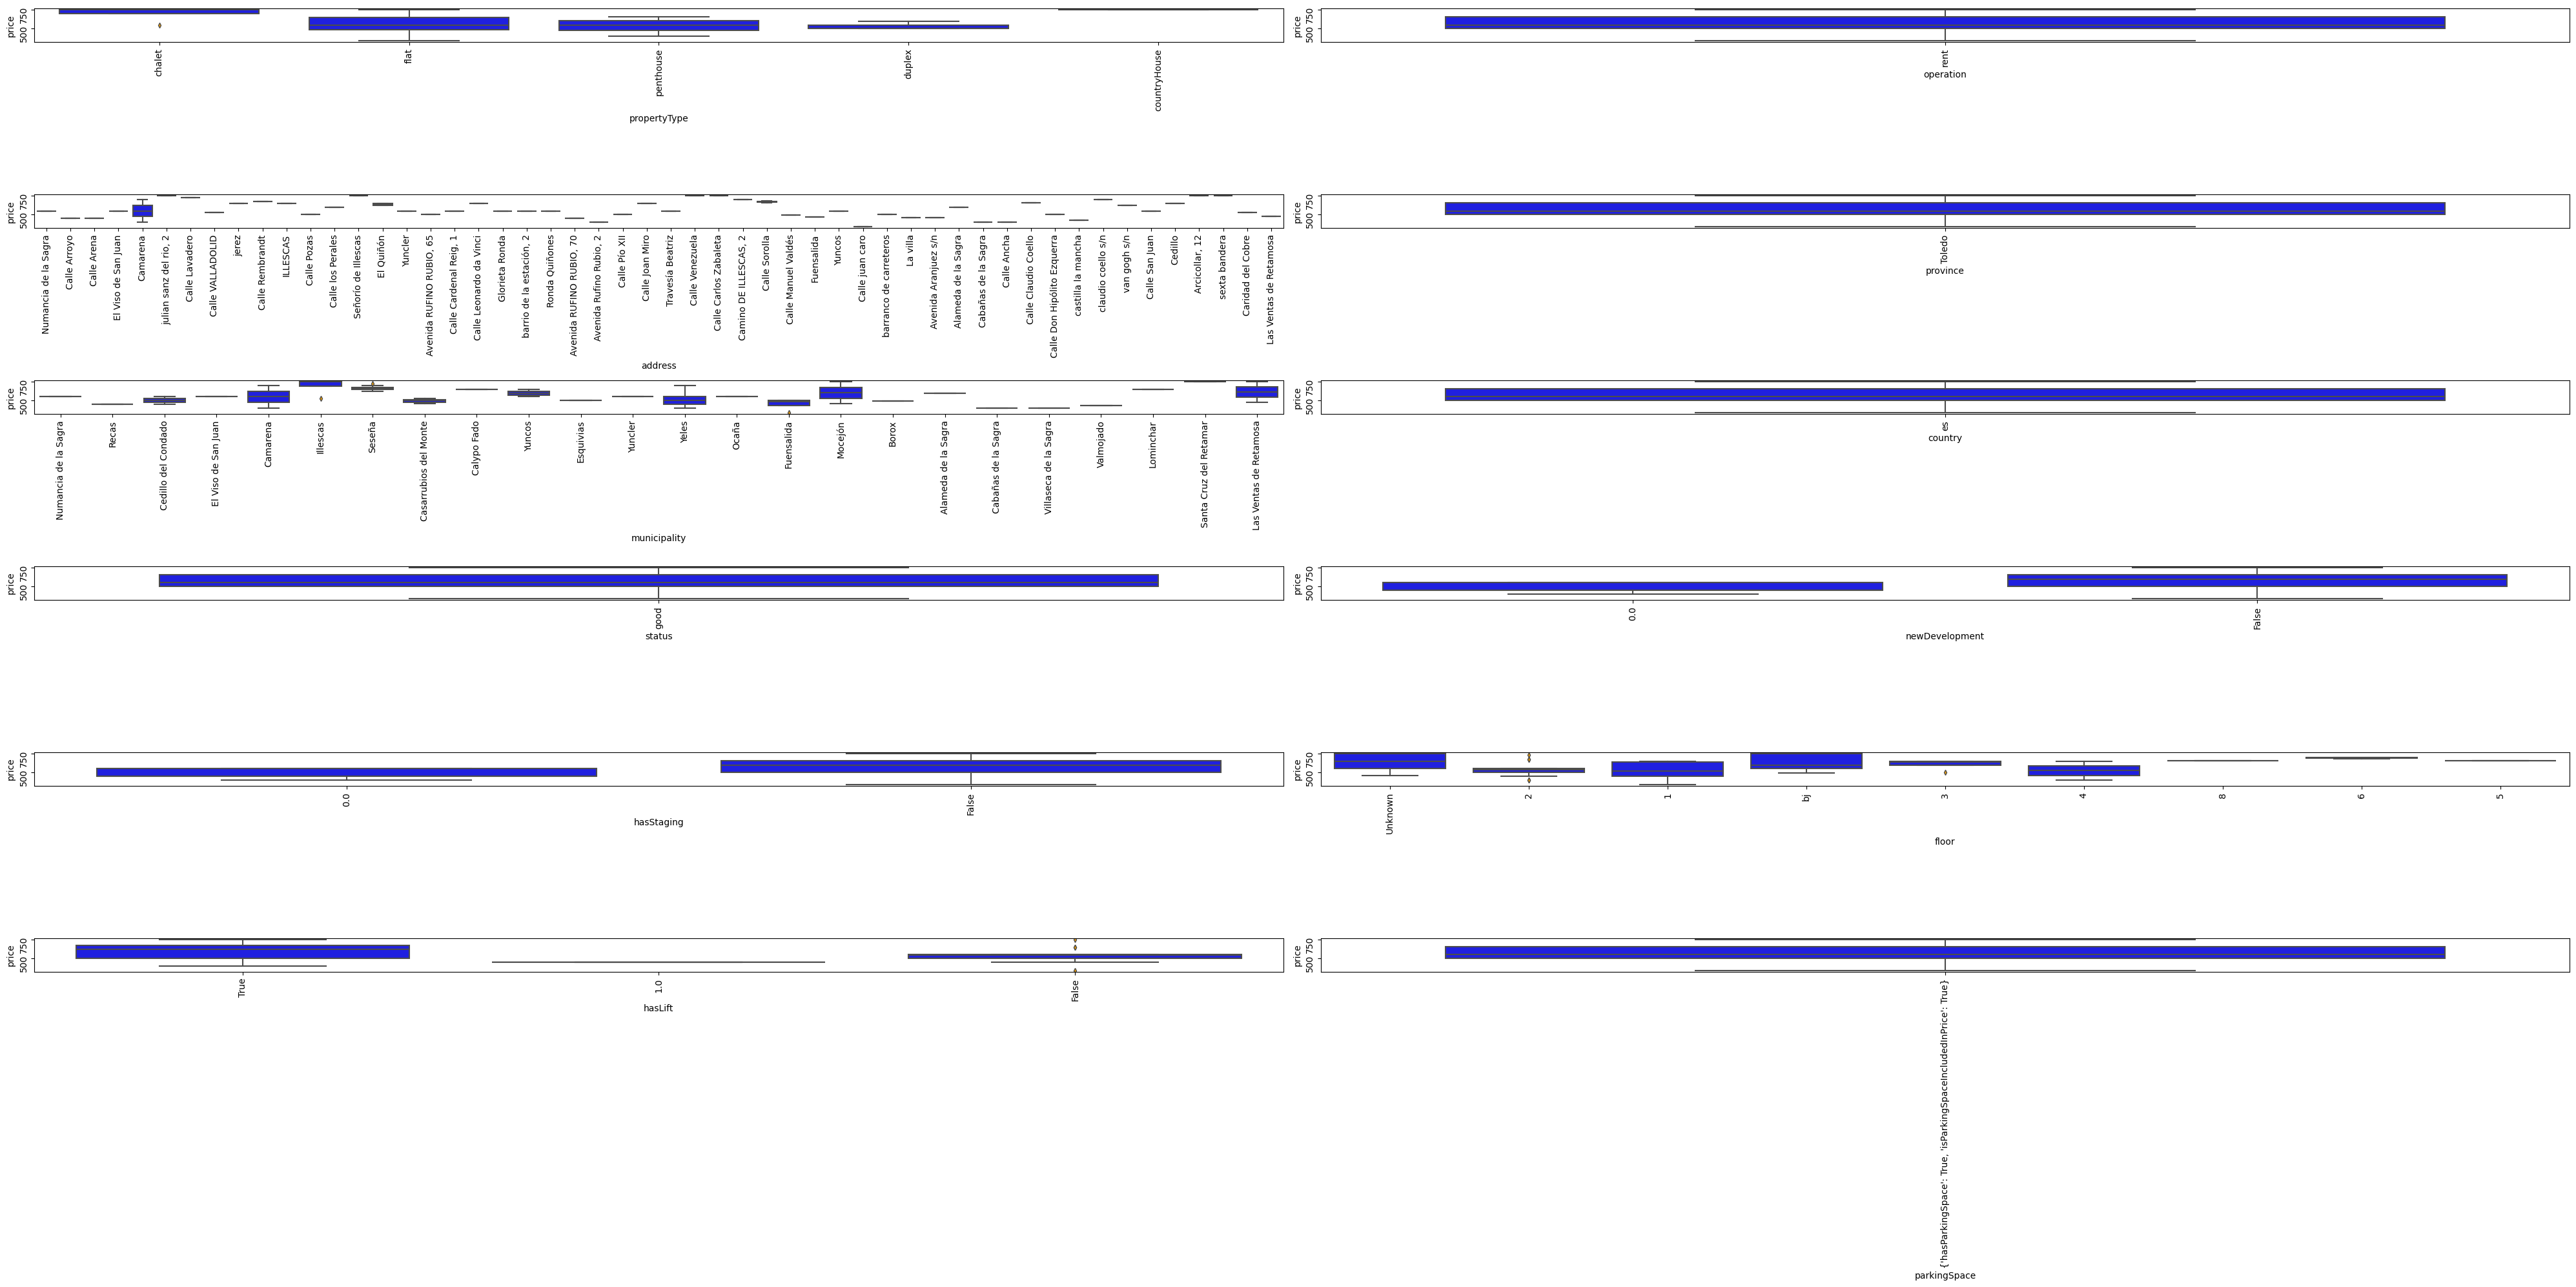

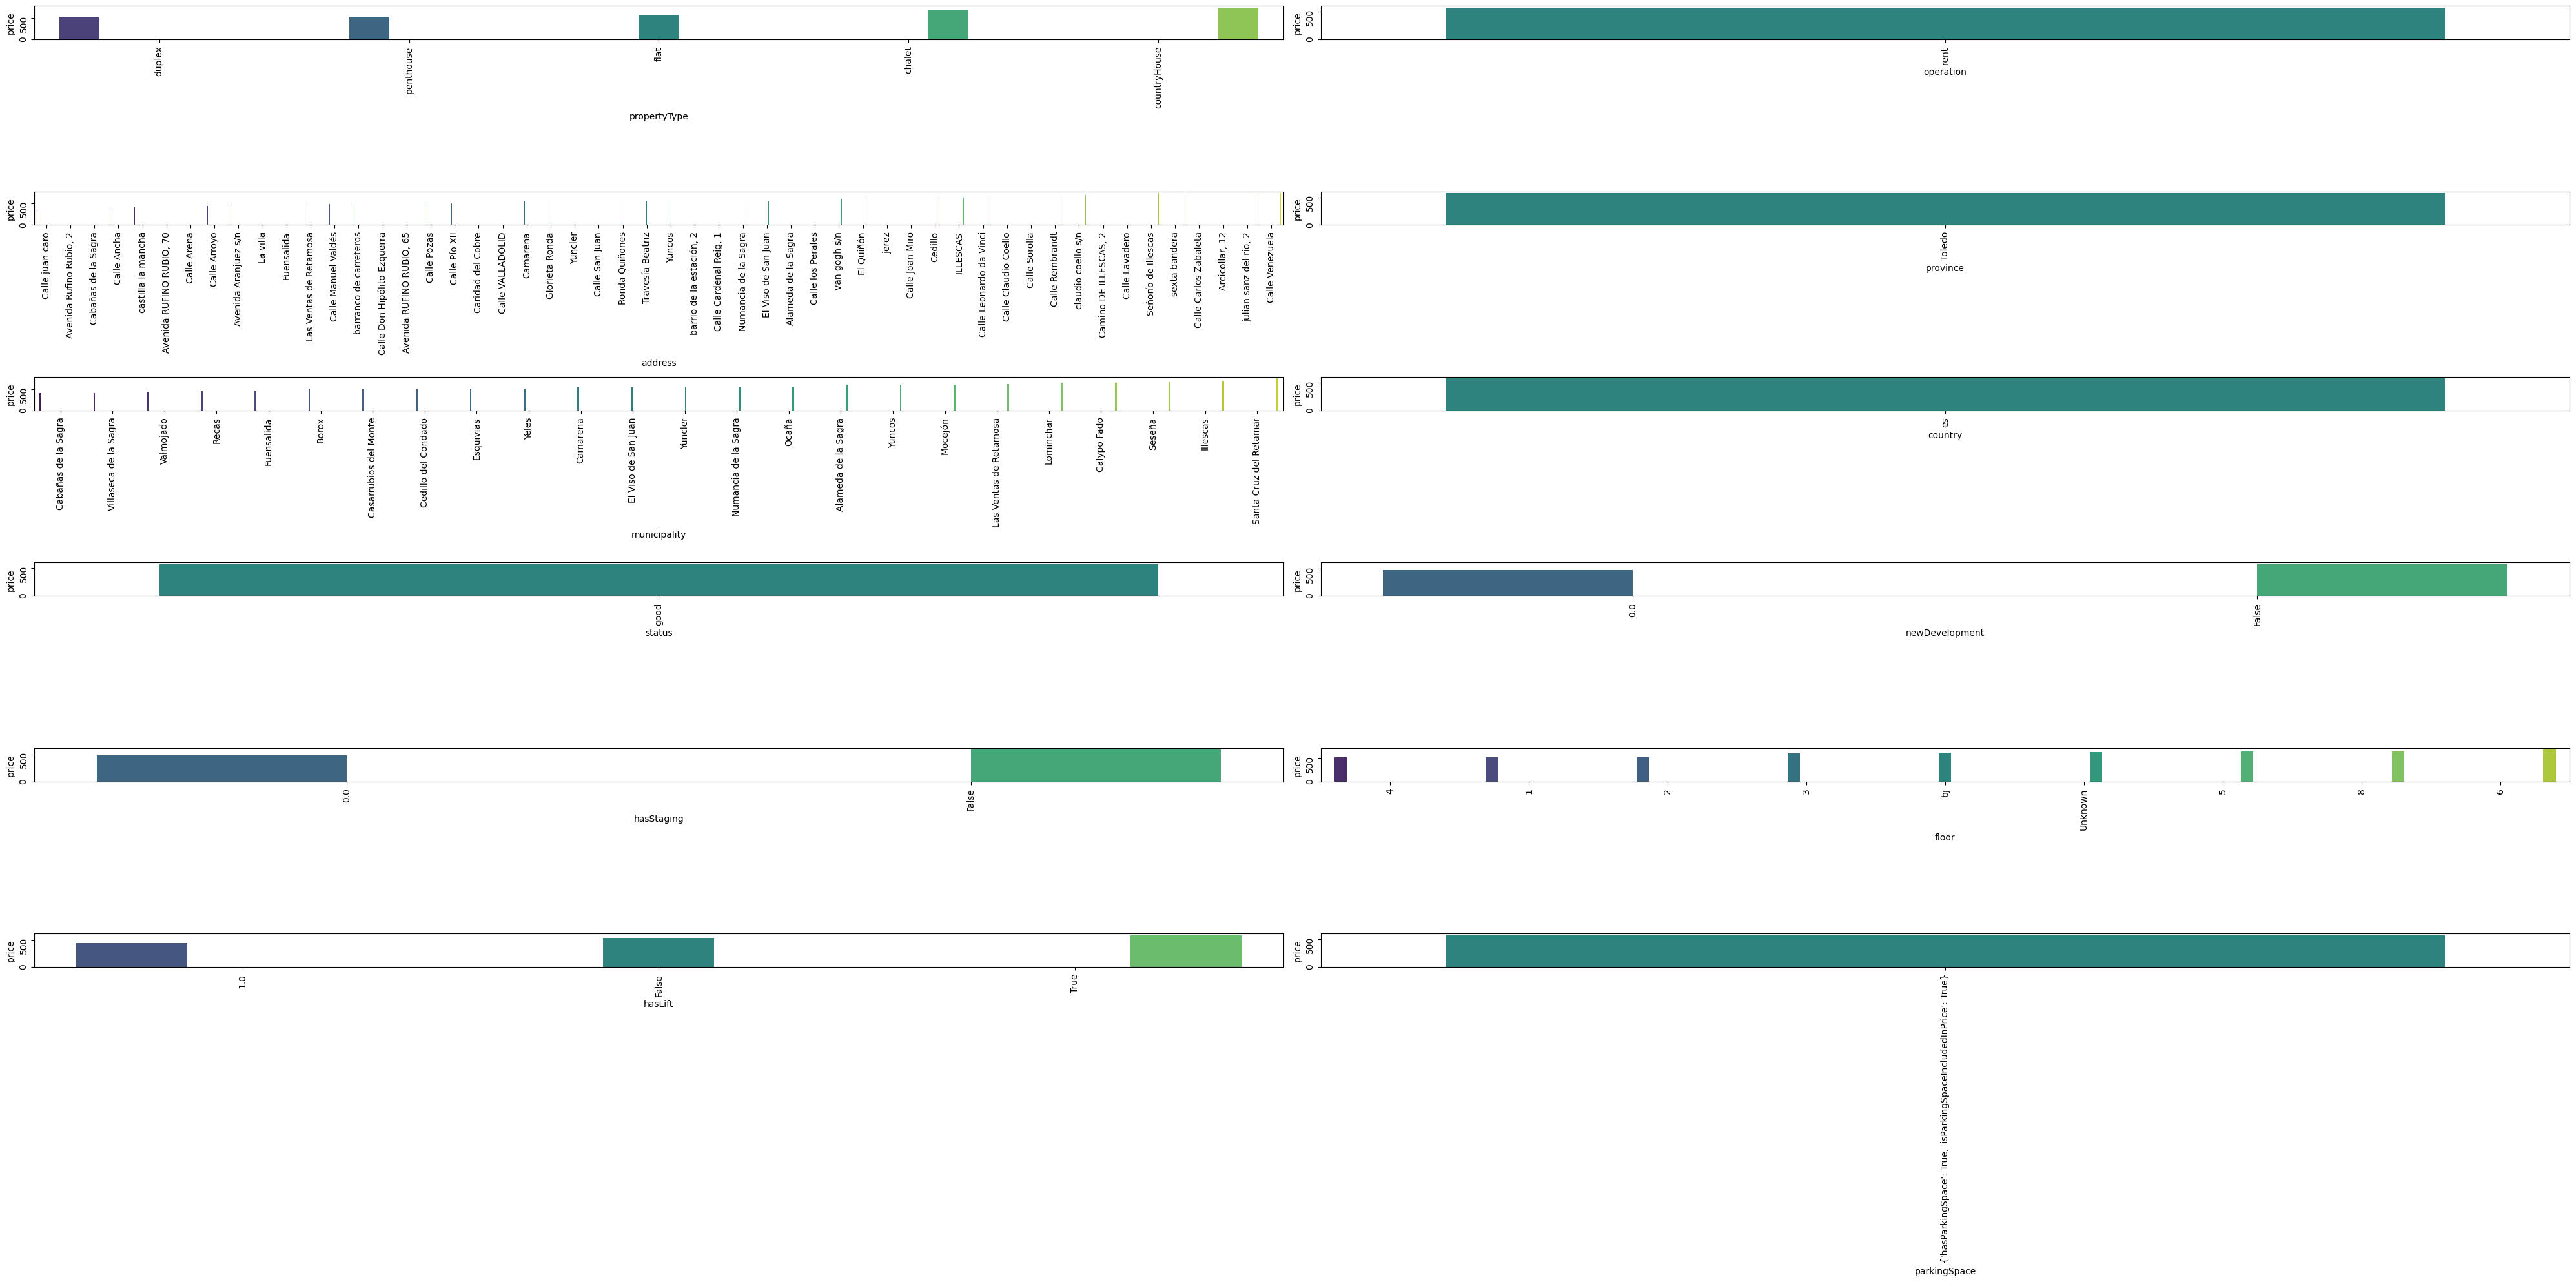

In [20]:
analisis_encoding = se.Analisis_Visual_Encoding(variable_respuesta="price", dataframe=df_filtrado_toledo, lista_variables_categorias= lista_col_categ)

analisis_encoding.crear_boxplot()
analisis_encoding.crear_barplot()

In [21]:
print("\n-------------\n")

for categoria in lista_col_categ:   
    print(f"Estamos analizando la variable {categoria.upper()}")

    # Verificar datos antes de la normalidad
    print("Verificando datos para normalidad...")
    if df_filtrado_toledo[categoria].isna().all():
        print(f"Error: Todos los valores en la columna {categoria} son nulos.")
        continue

    # Normalidad
    try:
        asunciones.identificar_norm
        mmalidad(metodo="kolmogorov")
    except Exception as e:
        print(f"Error al realizar la prueba de normalidad en {categoria}: {e}")

    # Homogeneidad
    print("Verificando datos para homogeneidad...")
    try:
        asunciones.identificar_homogeneidad(columna_categorica=categoria)
    except Exception as e:
        print(f"Error al realizar la prueba de homogeneidad en {categoria}: {e}")

    # Pruebas estadísticas
    print("Ejecutando pruebas estadísticas...")
    try:
        test = se.TestEstadisticos(df_filtrado_toledo, "price", categoria)
        test.run_all_tests()
    except Exception as e:
        print(f"Error al realizar pruebas estadísticas en {categoria}: {e}")

    print("\n###########################\n")



-------------

Estamos analizando la variable PROPERTYTYPE
Verificando datos para normalidad...
Error al realizar la prueba de normalidad en propertyType: name 'asunciones' is not defined
Verificando datos para homogeneidad...
Error al realizar la prueba de homogeneidad en propertyType: name 'asunciones' is not defined
Ejecutando pruebas estadísticas...
Generando grupos...
Grupos generados: ['chalet', 'flat', 'penthouse', 'duplex', 'countryHouse']
Opción de test no válida.
Los resultados del test de Tukey son: 


###########################

Estamos analizando la variable OPERATION
Verificando datos para normalidad...
Error al realizar la prueba de normalidad en operation: name 'asunciones' is not defined
Verificando datos para homogeneidad...
Error al realizar la prueba de homogeneidad en operation: name 'asunciones' is not defined
Ejecutando pruebas estadísticas...
Generando grupos...
Grupos generados: ['rent']

Realizando test de M...
Error al realizar pruebas estadísticas en opera

<div style="background-color: #F74646; padding: 10px; border-left: 6px solid #000080; color: black; border-radius: 10px;">
He elegido Kursall porque la columna "price" no tiene una distribución normal,  
</div>

# Interpretación de Resultados

Dado que hemos aplicado varios tests estadísticos (normalidad, homogeneidad, Mann-Whitney, Kruskal-Wallis, y Tukey), interpretaremos los resultados obtenidos para cada variable categórica.

---

## **PropertyType**

Los resultados muestran que no hay homogeneidad entre los grupos y el test de Mann-Whitney no se pudo realizar correctamente debido a la estructura de los datos. Los grupos generados para el análisis son: `flat`, `penthouse`, `studio`, `duplex`, `chalet`, `countryHouse`.

### **En resumen:**
Dado que los datos no cumplen las suposiciones de normalidad ni homogeneidad, pero las categorías representan tipos de propiedades bien definidas, recomendamos utilizar un **Target Encoding**. Este método permite capturar las diferencias en la variable respuesta (`price`) asociadas a cada tipo de propiedad.

---

## **Operation**

Los resultados muestran que solo existe una categoría (`rent`), lo que impide realizar comparaciones estadísticas significativas.

### **En resumen:**
Dado que no hay variación en esta variable, no se necesita ningún tipo de encoding. Esta columna podría descartarse del modelo.

---

## **Address**

Con más de 300 categorías únicas, las pruebas no son fiables debido a la alta cardinalidad. Aunque el test de Tukey identifica diferencias significativas entre algunas categorías, este nivel de detalle no es útil para un modelo.

### **En resumen:**
Recomendamos descartar esta columna debido a su alta cardinalidad y poca utilidad práctica para el análisis. Si es necesario conservarla, se podría agrupar por zonas o áreas más generales.

---

## **Province**

Al tener solo una categoría (`Toledo`), no se pueden realizar pruebas estadísticas ni extraer información útil.

### **En resumen:**
Esta columna puede ser eliminada, ya que no aporta variación al modelo.

---

## **Municipality**

El test de Kruskal-Wallis indica diferencias significativas entre las categorías, lo que sugiere que esta variable puede ser relevante para el modelo. Algunas de las categorías son `Numancia de la Sagra`, `Recas`, `Cedillo del Condado`, `Illescas`, etc.

### **En resumen:**
Dado que esta columna tiene muchas categorías pero diferencias significativas, recomendamos utilizar un **Target Encoding**. Esto permitirá capturar la influencia de cada municipio en la variable respuesta (`price`).

---

## **NewDevelopment**

Los resultados muestran que hay diferencias significativas entre los grupos (`0.0`, `False`, `True`) en el test de Kruskal-Wallis.

### **En resumen:**
Esta variable es categórica con pocas categorías claras, por lo que recomendamos utilizar un **Ordinal Encoding** simple, asignando valores de 0 a 2 a las categorías `0.0`, `False`, y `True`.

---

## **HasStaging**

Los resultados muestran diferencias significativas entre los grupos (`0.0`, `False`) en el test de Kruskal-Wallis.

### **En resumen:**
Dado que hay diferencias significativas pero la variable tiene pocas categorías, recomendamos codificarla con un **Binary Encoding**.

---

## **Floor**

El test de Kruskal-Wallis indica diferencias significativas entre las categorías (`Unknown`, `2`, `1`, `bj`, `3`, `4`, etc.), lo que sugiere que esta variable es importante.

### **En resumen:**
Recomendamos un **Ordinal Encoding**, ya que las categorías representan niveles ordenados (pisos).

---

## **District**

La variable tiene muchas categorías (algunas con valores nulos), pero los resultados de las pruebas no son significativos.

### **En resumen:**
Dado que esta variable tiene alta cardinalidad, recomendamos agrupar los distritos en categorías más amplias (por ejemplo, regiones) antes de aplicar un **Target Encoding**.

---

## **HasLift**

Los resultados muestran que no hay diferencias significativas entre las categorías (`True`, `1.0`, `False`) en el test de Kruskal-Wallis.

### **En resumen:**
Aunque no se encontraron diferencias significativas, recomendamos un **Ordinal Encoding** para esta columna, ya que las categorías tienen un orden lógico que podría ser relevante para el modelo.

---

## **ParkingSpace**

Los resultados muestran que solo hay un grupo único (`{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': True}`), lo que impide realizar análisis significativos.

### **En resumen:**
Dado que no hay variación en esta variable, puede descartarse del modelo.


In [22]:
y = df_filtrado_toledo['price']
X = df_filtrado_toledo.drop('price', axis=1)

In [23]:
tar_encoder = TargetEncoder(lista_col_categ)
df_filtrado_toledo = tar_encoder.fit_transform(df_filtrado_toledo, df_filtrado_toledo["price"])
df_filtrado_toledo

,price,propertyType,operation,size,exterior,rooms,bathrooms,address,province,municipality,country,showAddress,distance,status,newDevelopment,hasStaging,floor,hasLift,parkingSpace,priceByArea_knn
0,550.00,598.27,577.80,371.00,False,6,3,574.18,577.80,574.18,577.80,False,40116,576.94,559.96,559.96,596.56,591.69,577.80,1.00
1,450.00,568.30,577.80,89.00,False,2,1,561.17,577.80,561.17,577.80,False,47186,576.94,559.96,559.96,564.28,561.17,577.80,5.00
2,450.00,568.30,577.80,60.00,True,2,1,561.17,577.80,566.76,577.80,False,38237,576.94,559.96,559.96,556.53,564.15,577.80,8.00
3,550.00,568.30,577.80,90.00,True,3,1,574.18,577.80,573.85,577.80,False,35627,576.94,559.96,559.96,564.28,564.15,577.80,6.00
4,400.00,571.44,577.80,70.00,True,2,1,573.85,577.80,573.85,577.80,False,50710,576.94,559.96,559.96,564.28,591.69,577.80,6.00
5,750.00,568.30,577.80,95.00,True,3,2,600.20,577.80,597.27,577.80,True,34444,579.85,586.56,586.56,596.56,591.69,577.80,6.29
6,730.00,568.30,577.80,98.00,True,3,2,597.60,577.80,607.18,577.80,False,35011,576.94,586.56,586.56,564.28,591.69,577.80,7.00
7,530.00,568.30,577.80,50.00,True,2,1,571.58,577.80,565.26,577.80,False,36223,576.94,586.56,586.56,556.53,564.15,577.80,11.00
8,650.00,568.30,577.80,70.00,True,2,1,588.04,577.80,588.04,577.80,False,35607,576.94,586.56,586.56,556.53,564.15,577.80,9.00
9,650.00,568.30,577.80,70.00,True,2,1,588.04,577.80,588.04,577.80,False,36358,576.94,586.56,586.56,556.53,564.15,577.80,9.00


## Outliers

In [24]:
GestorOutliersUnivariados = so.GestionOutliersUnivariados(df_filtrado_toledo)

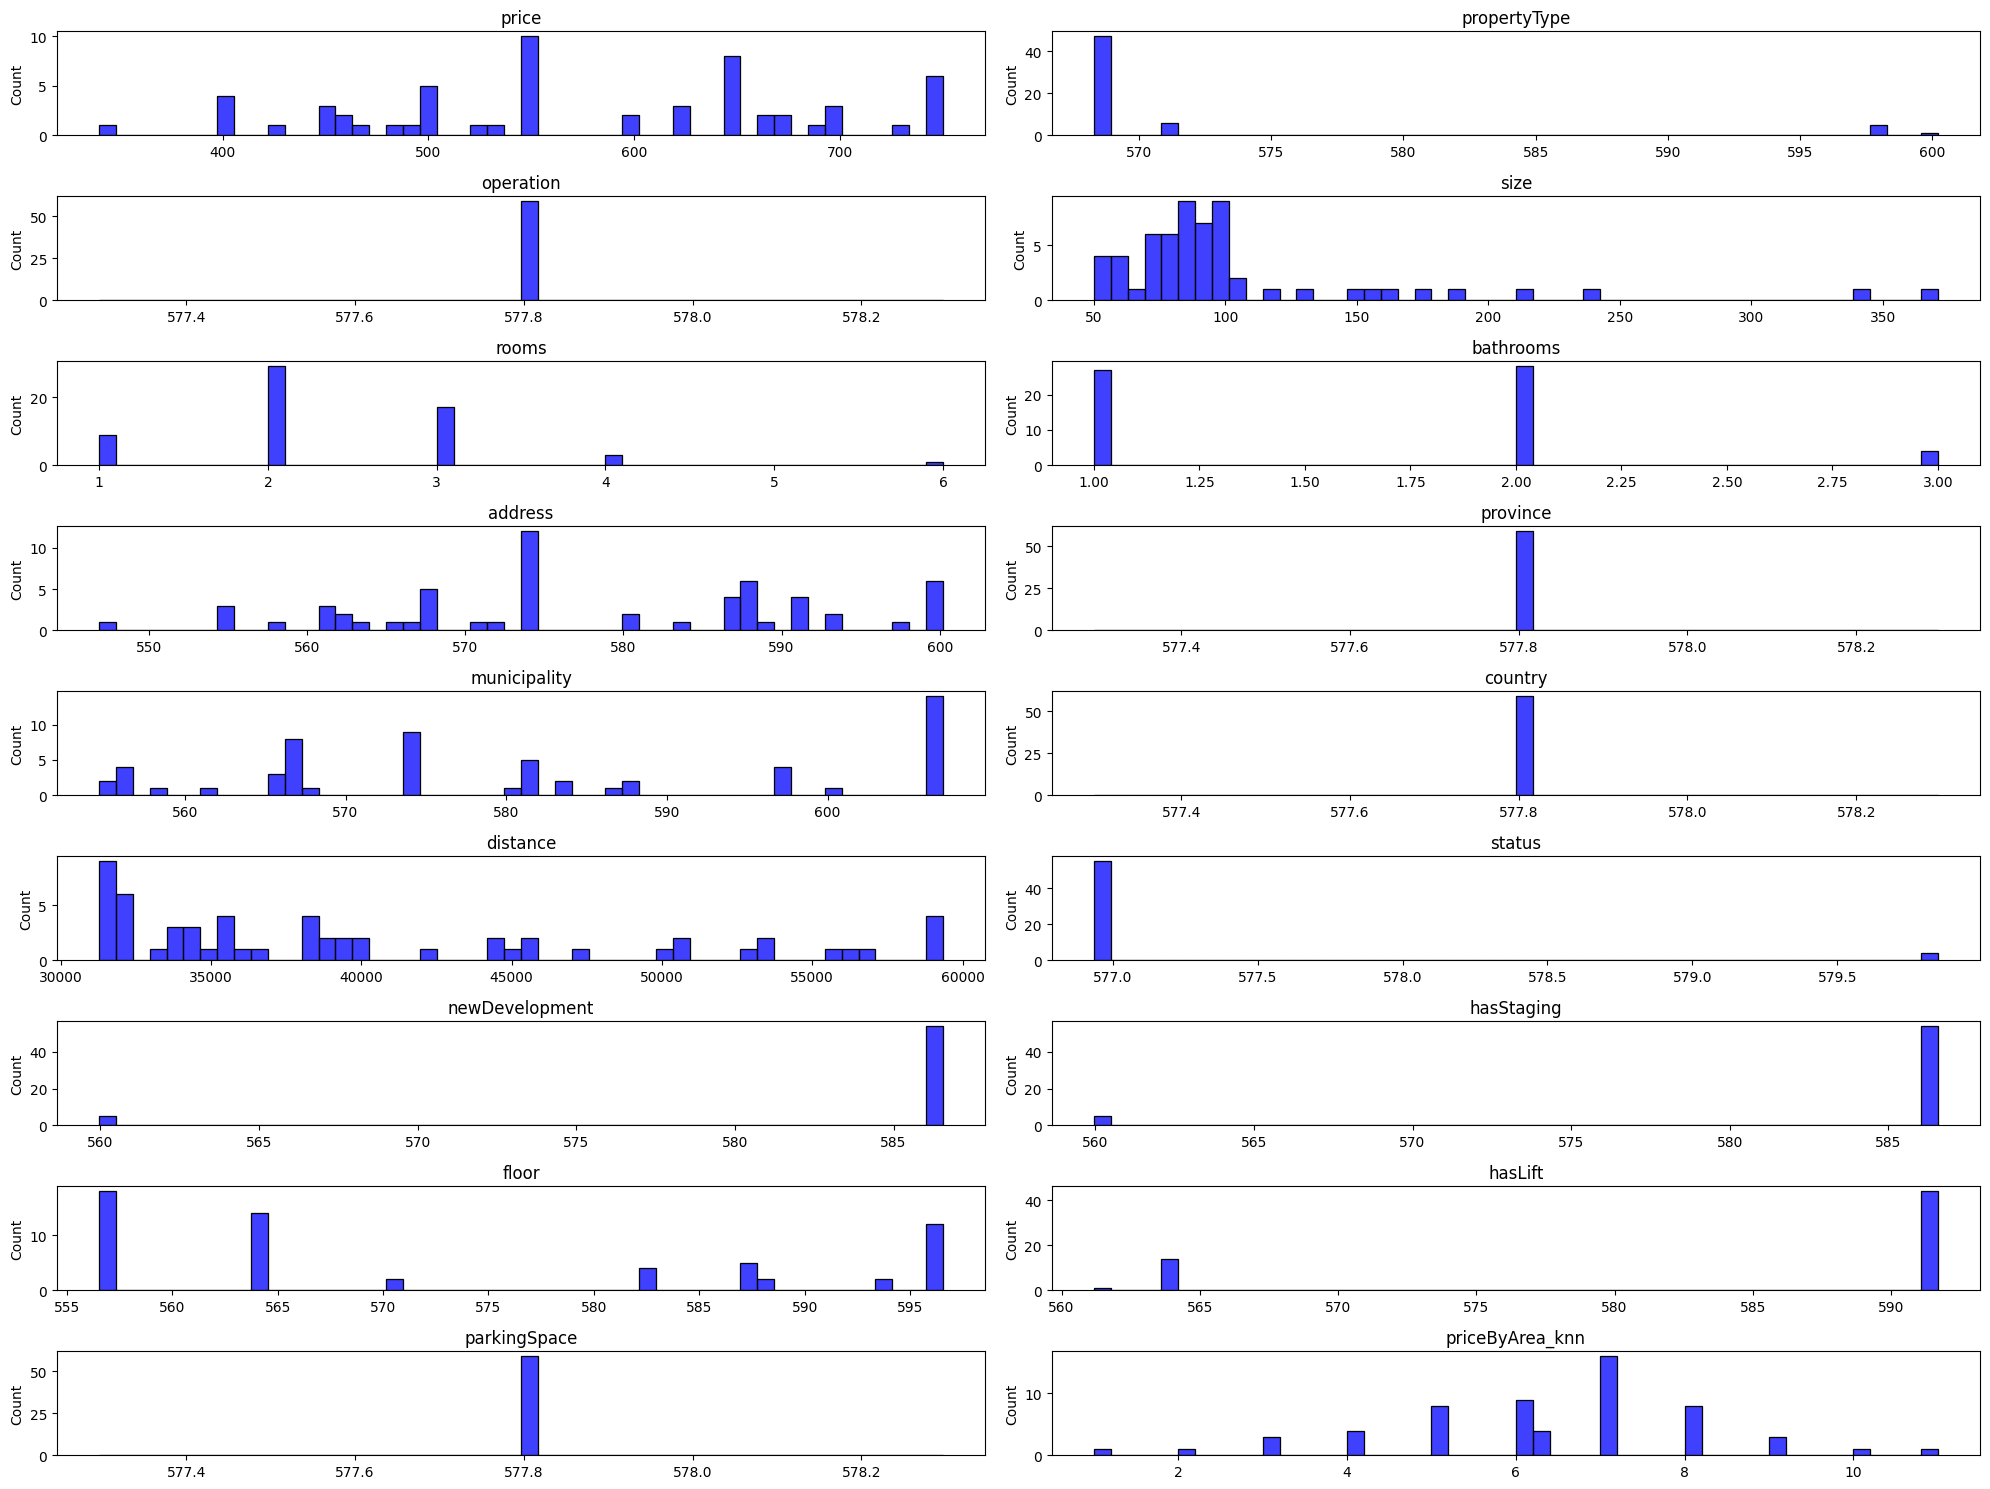

In [25]:
GestorOutliersUnivariados.visualizar_outliers_univariados()

In [26]:
outliers_iqr = GestorOutliersUnivariados.detectar_outliers_iqr()

La cantidad de outliers que tenemos para la columna PROPERTYTYPE es 12
La cantidad de outliers que tenemos para la columna SIZE es 9
La cantidad de outliers que tenemos para la columna ROOMS es 1
La cantidad de outliers que tenemos para la columna STATUS es 4
La cantidad de outliers que tenemos para la columna NEWDEVELOPMENT es 5
La cantidad de outliers que tenemos para la columna HASSTAGING es 5
La cantidad de outliers que tenemos para la columna PRICEBYAREA_KNN es 2


In [27]:
GestorOutliersMultivariados = so.GestionOutliersMultivariados(df_filtrado_toledo)

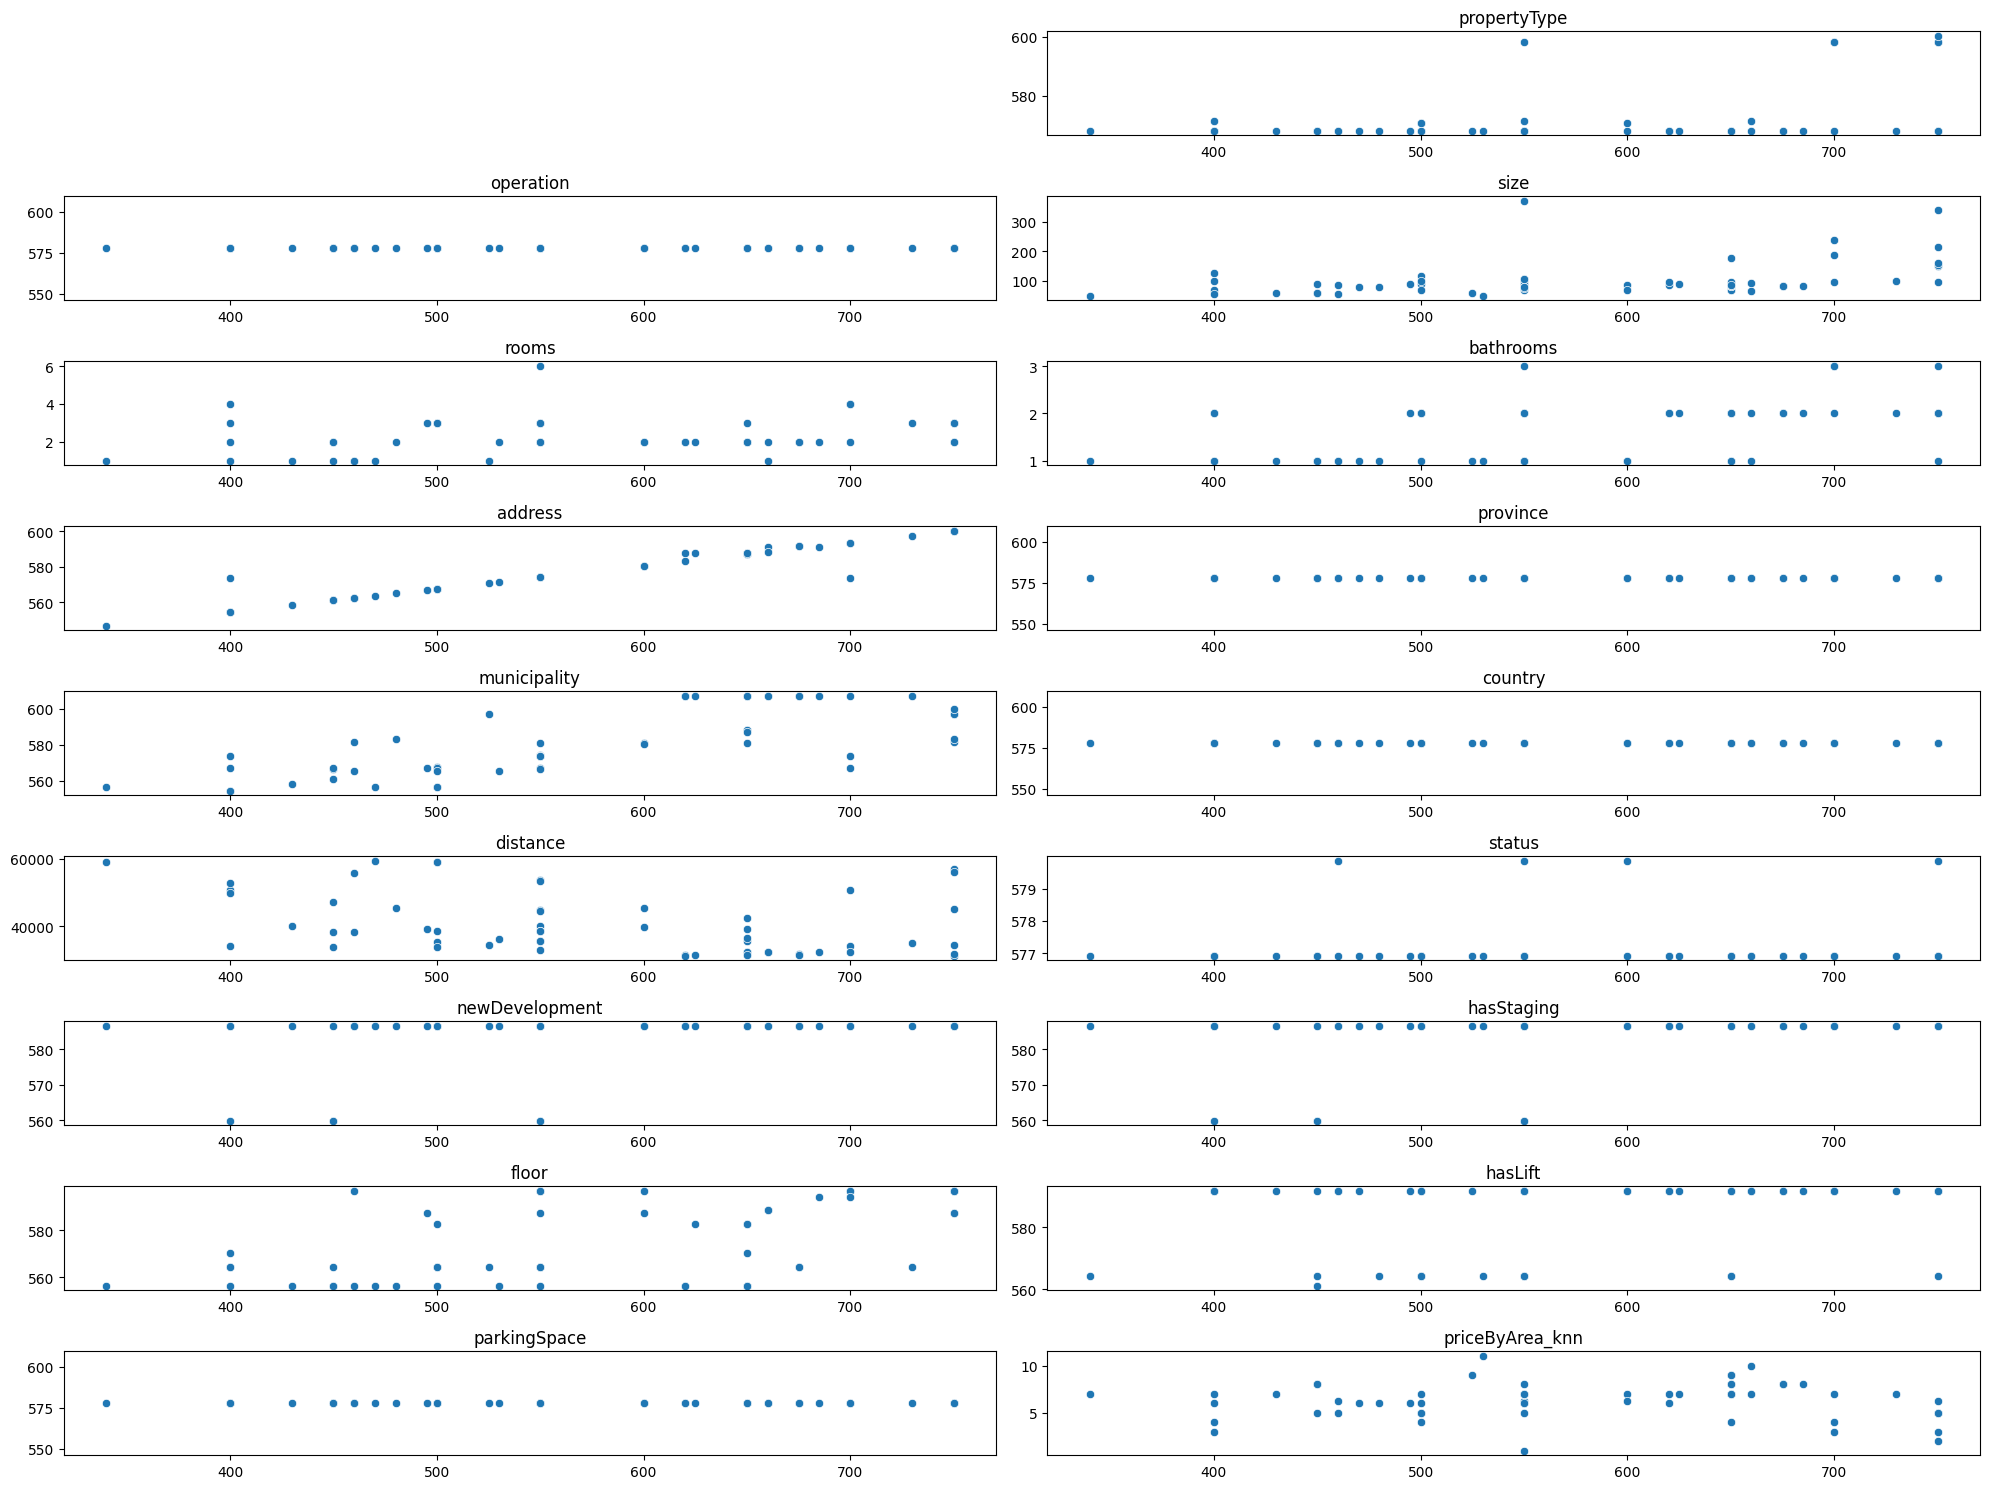

In [28]:
GestorOutliersMultivariados.visualizar_outliers_bivariados("price")

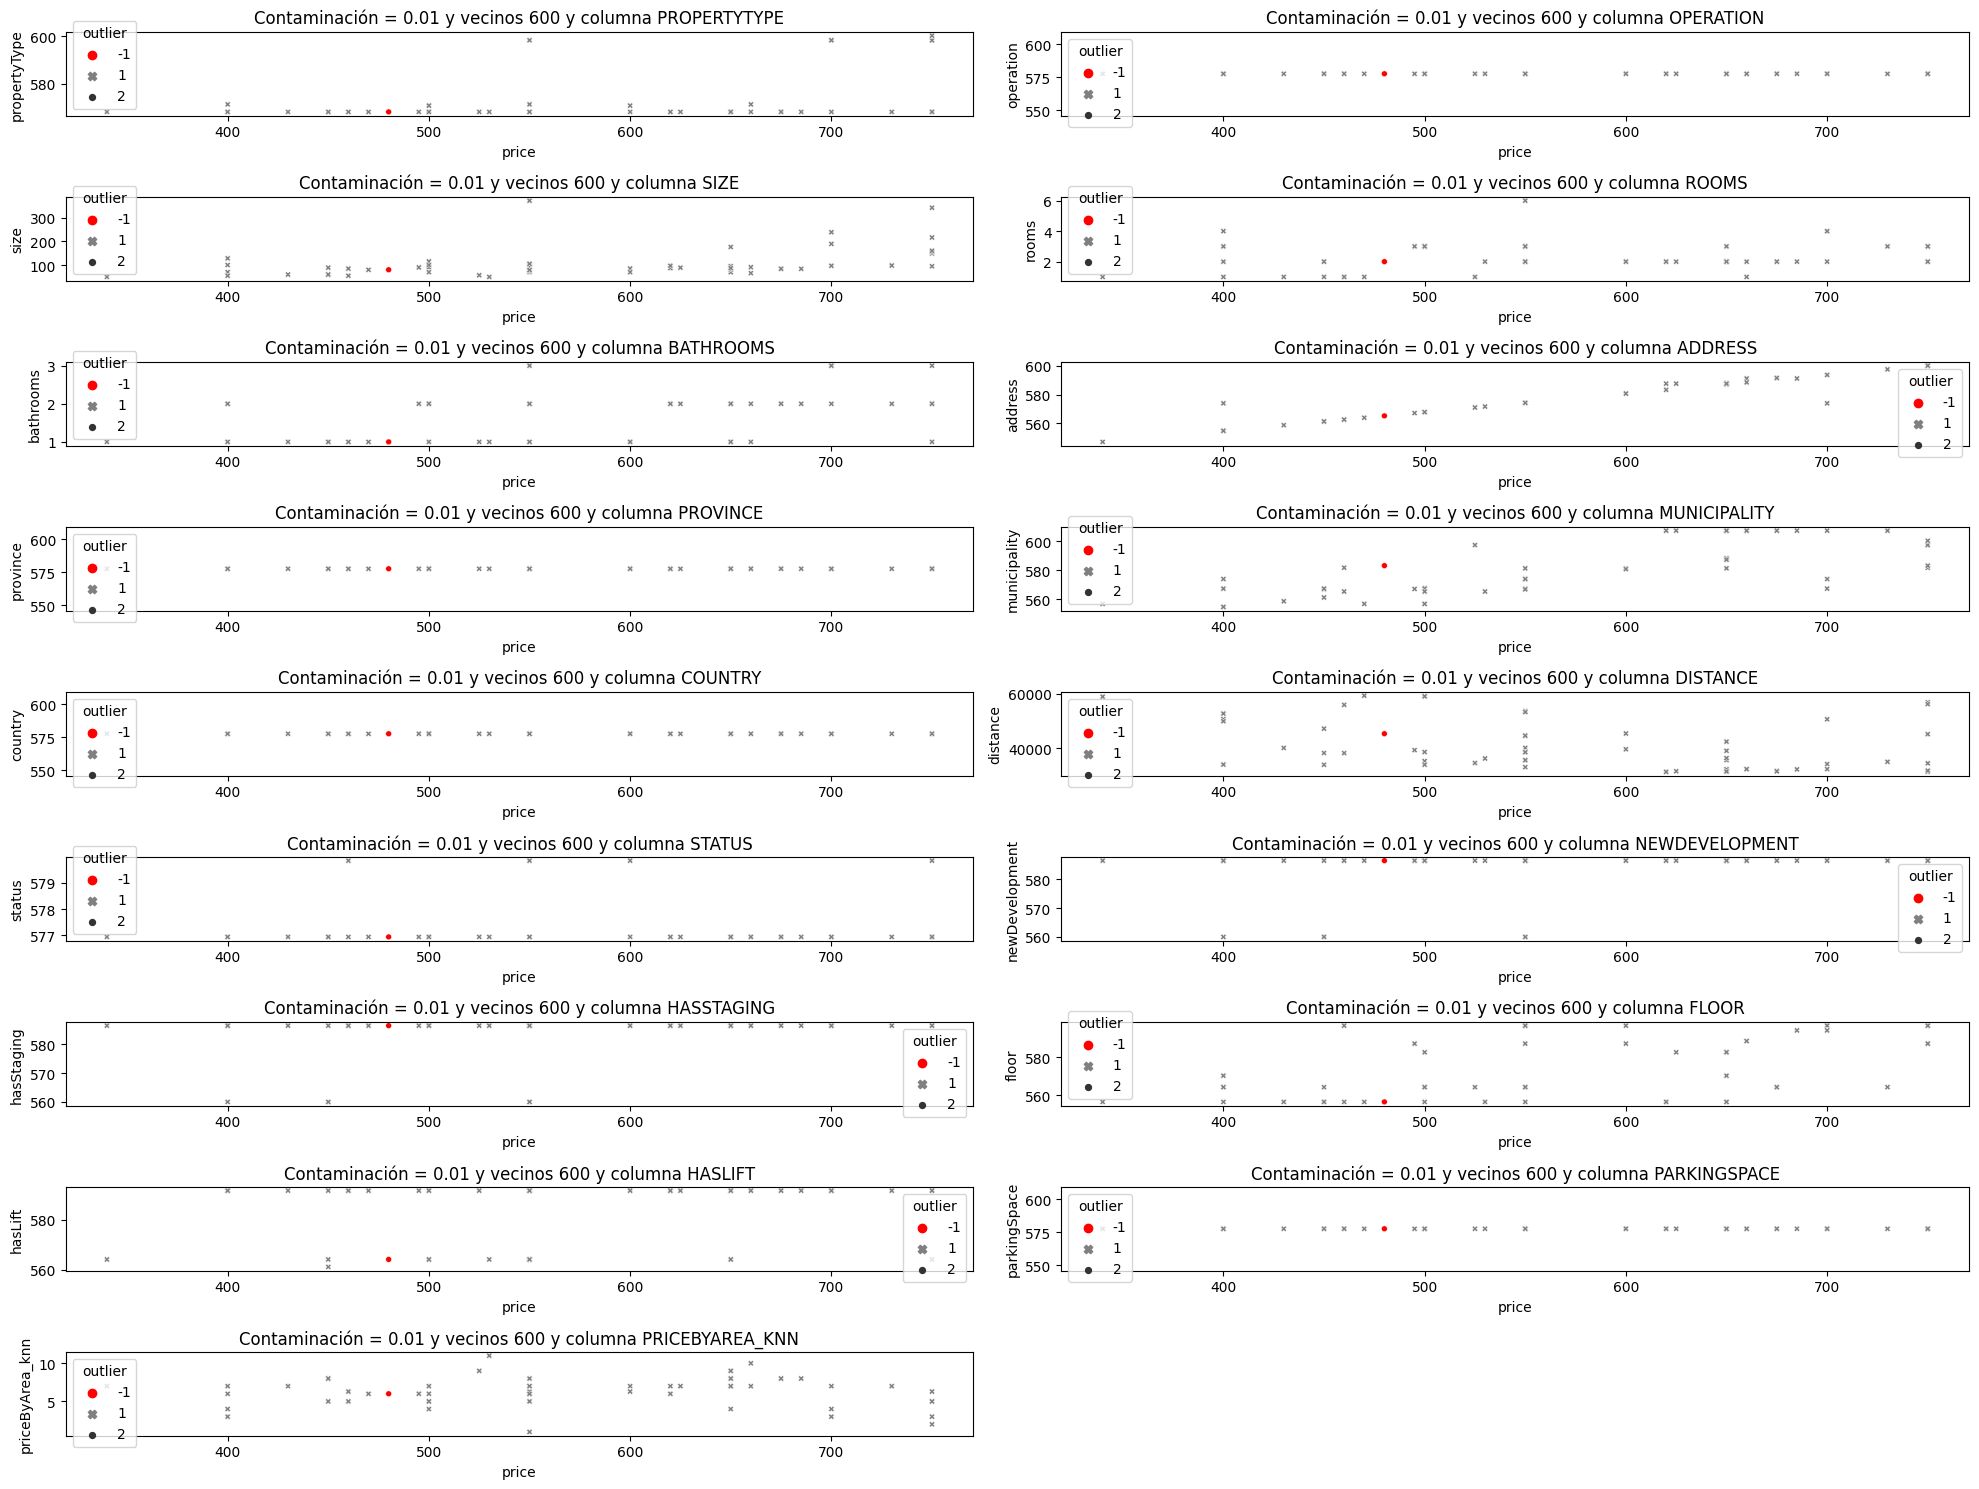

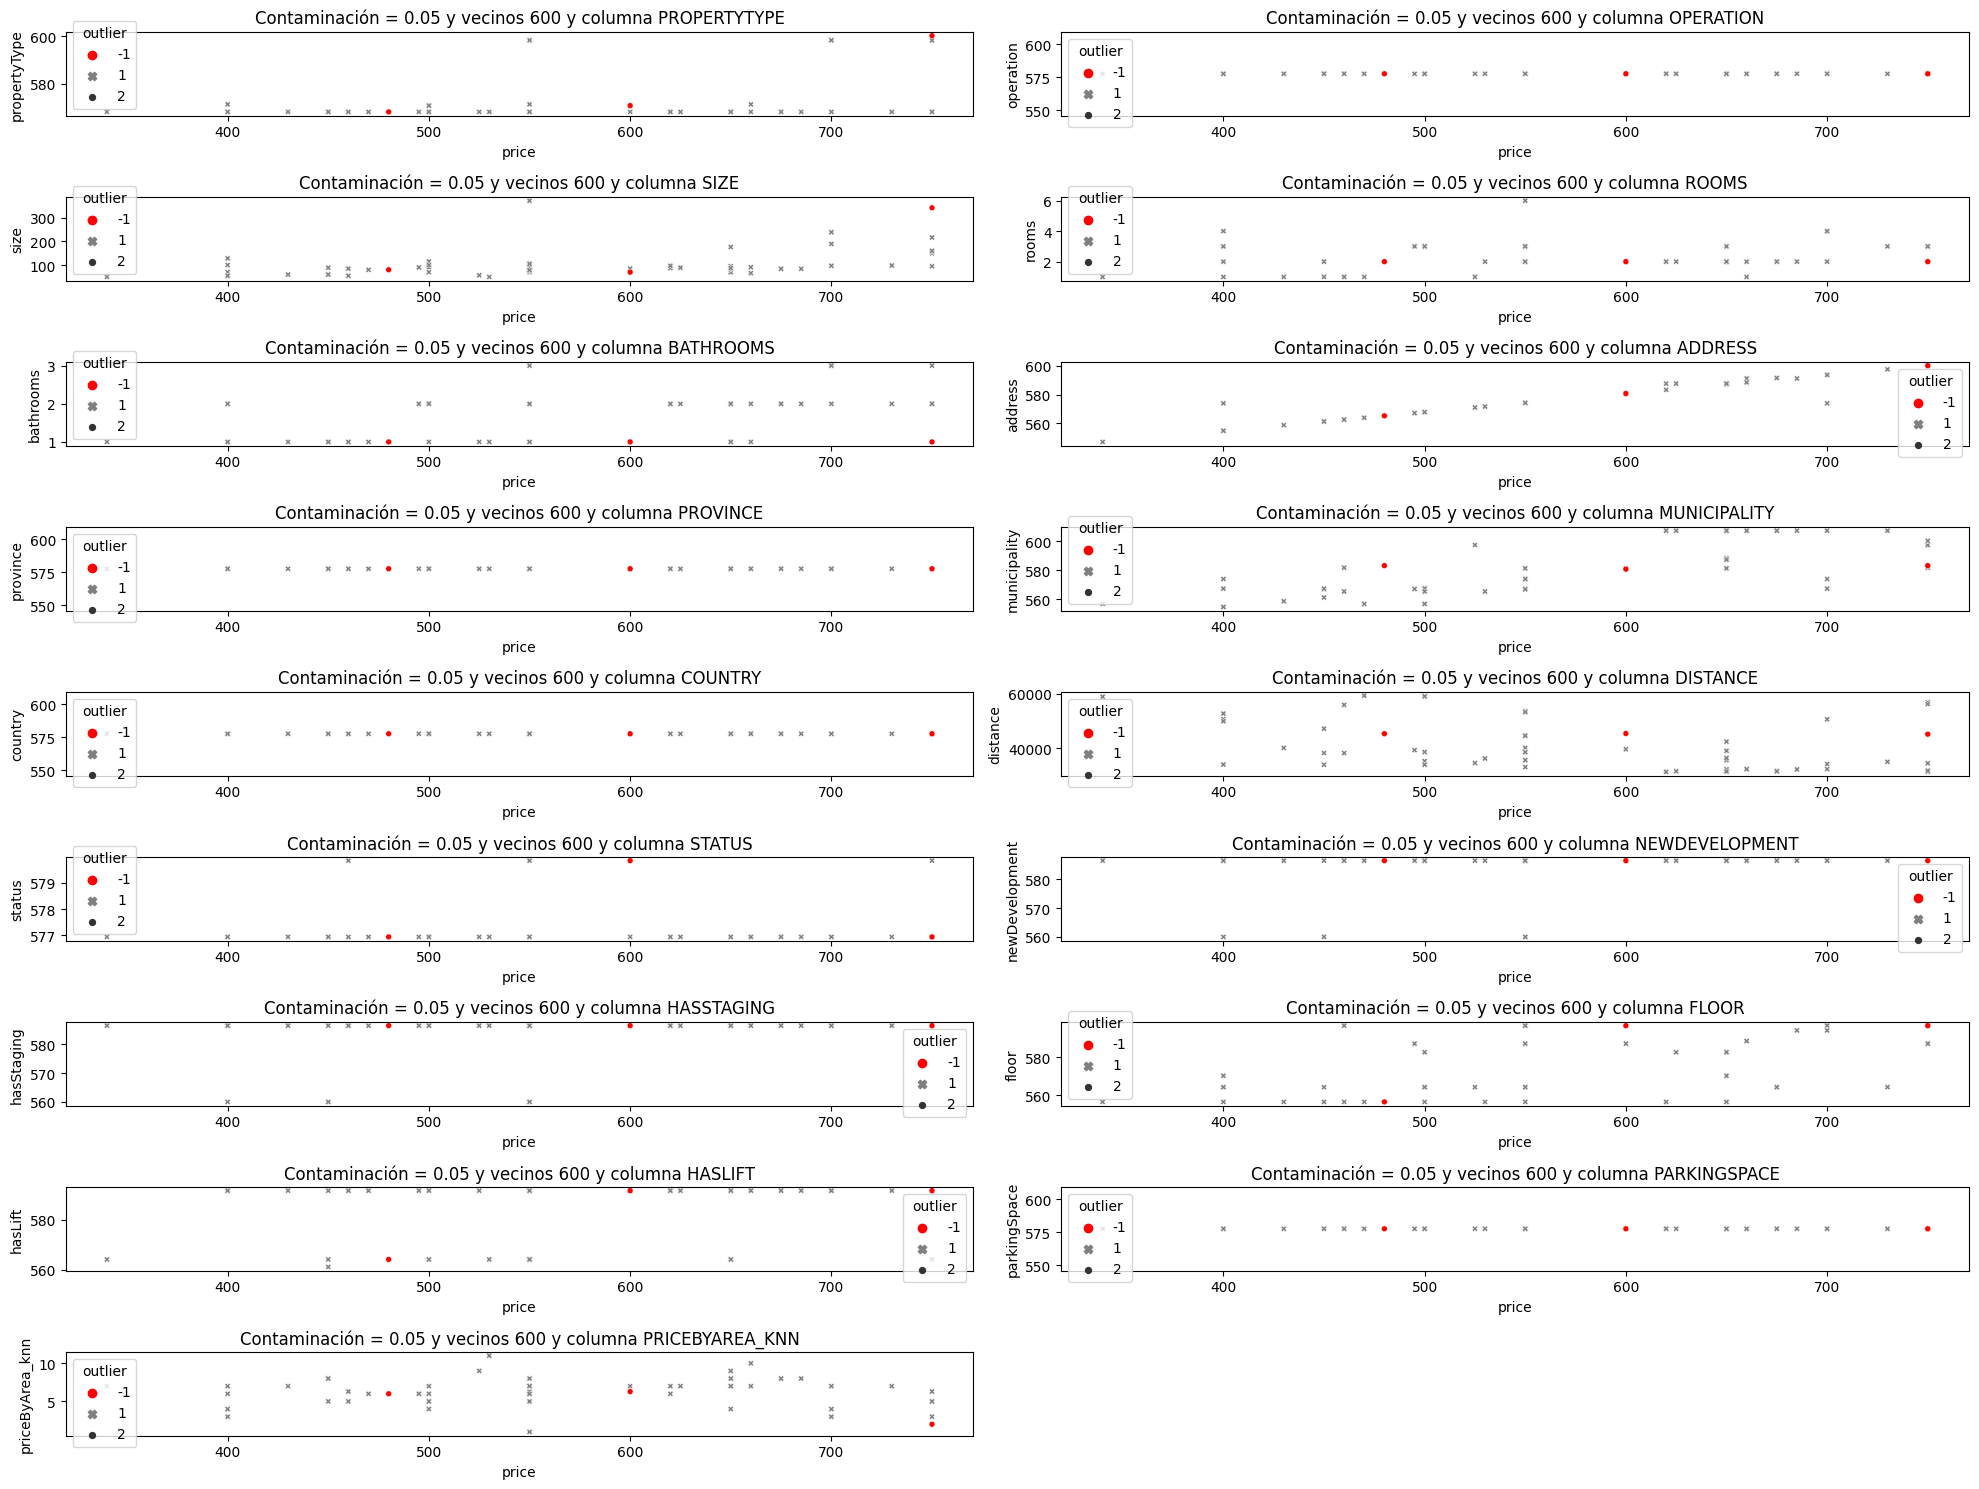

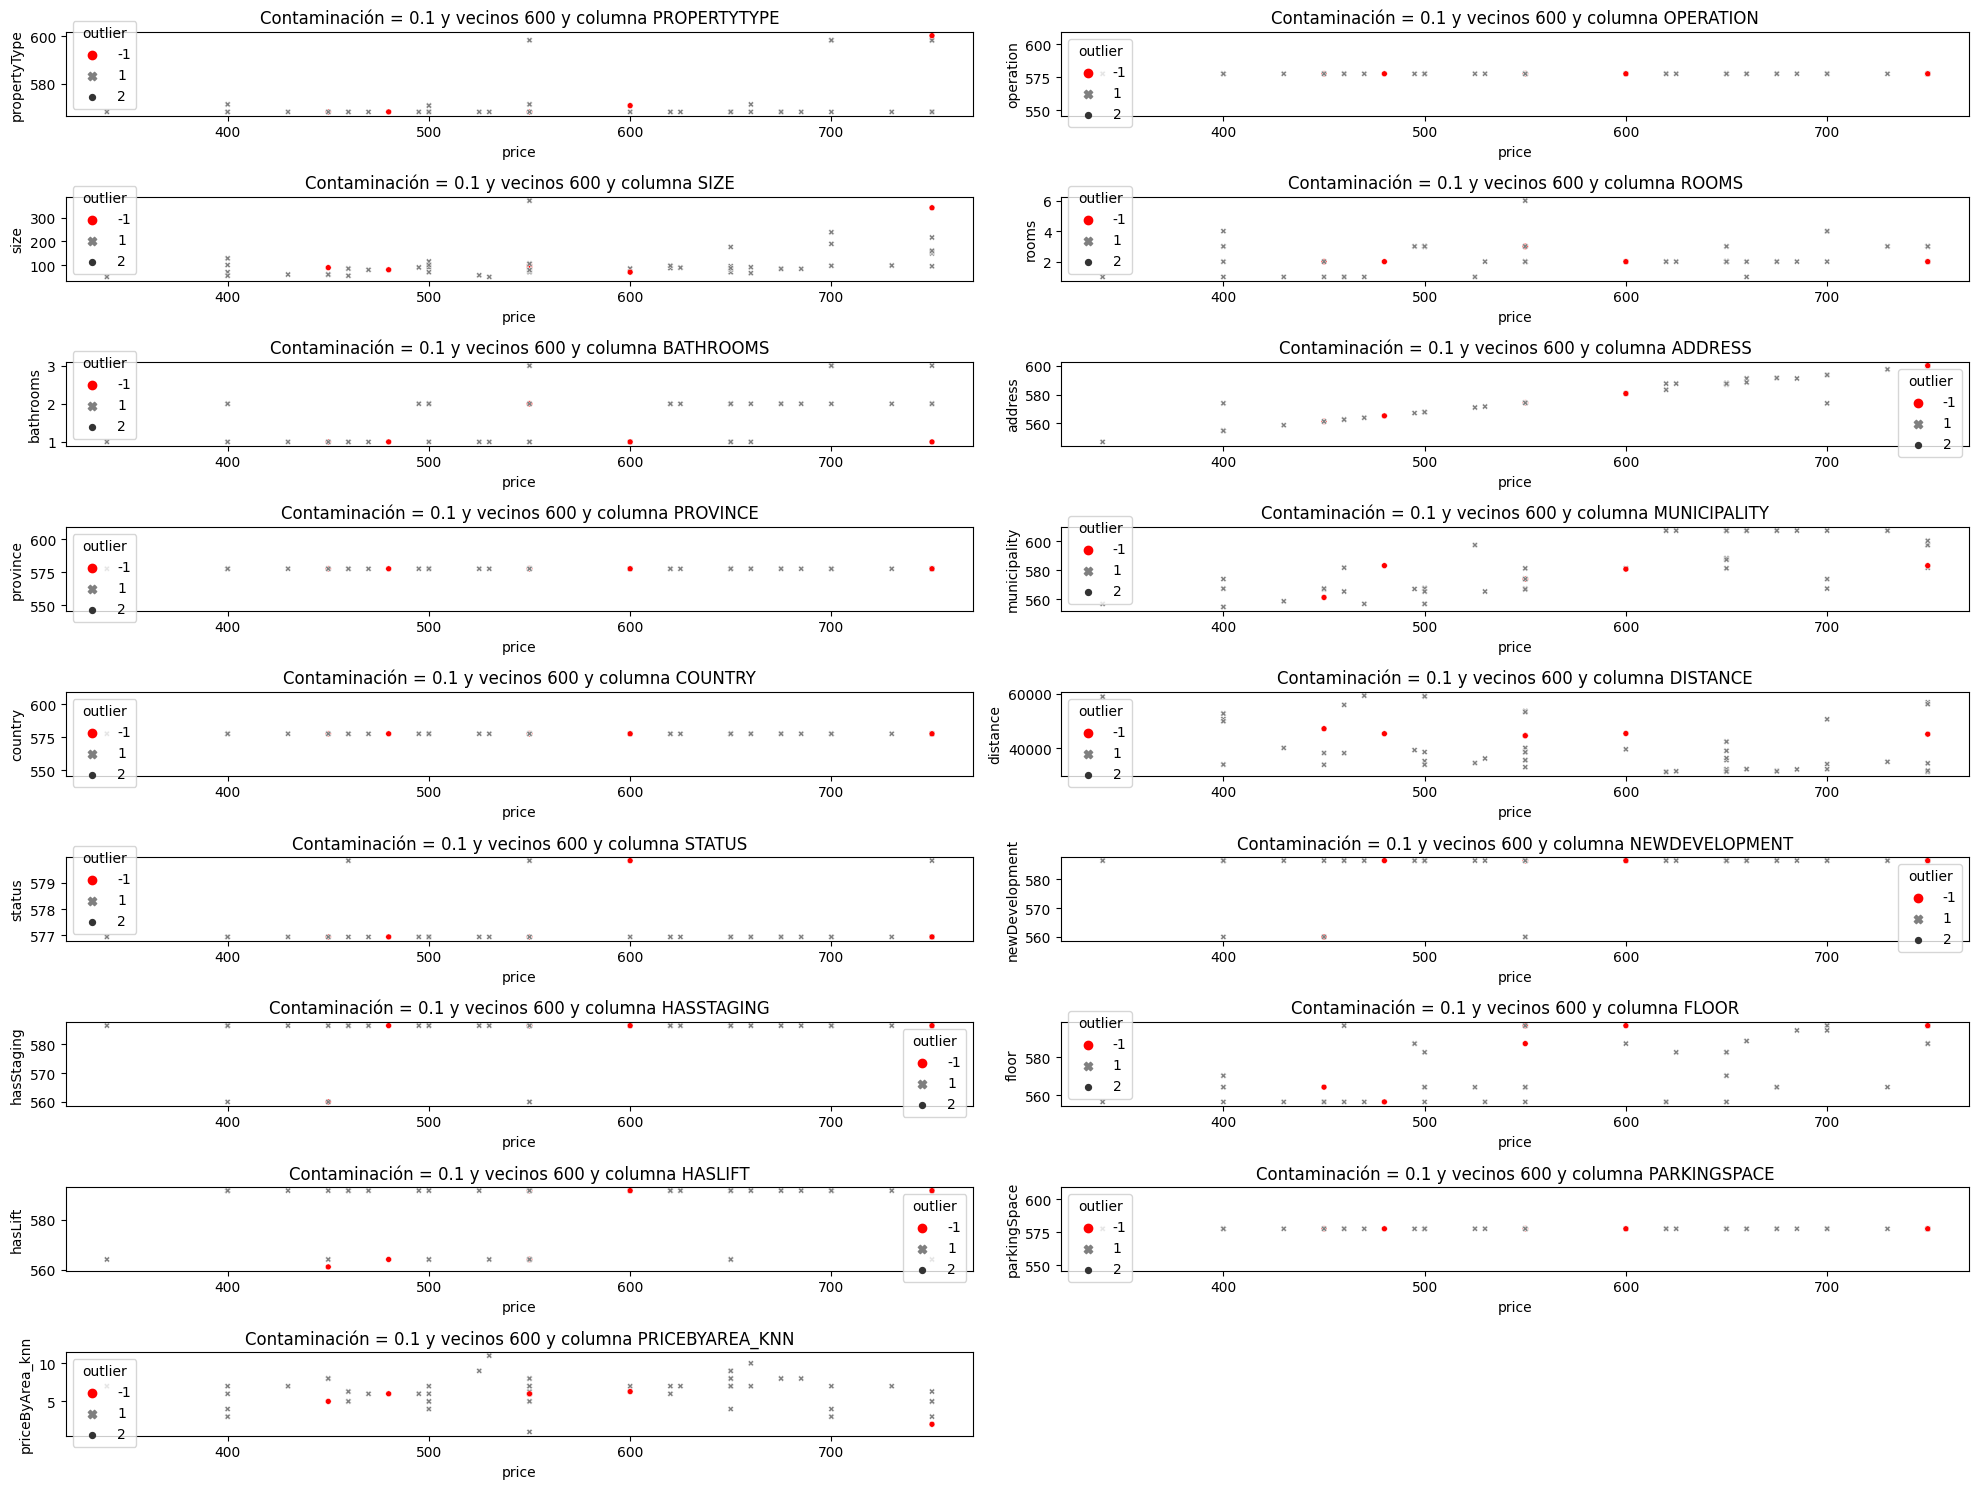

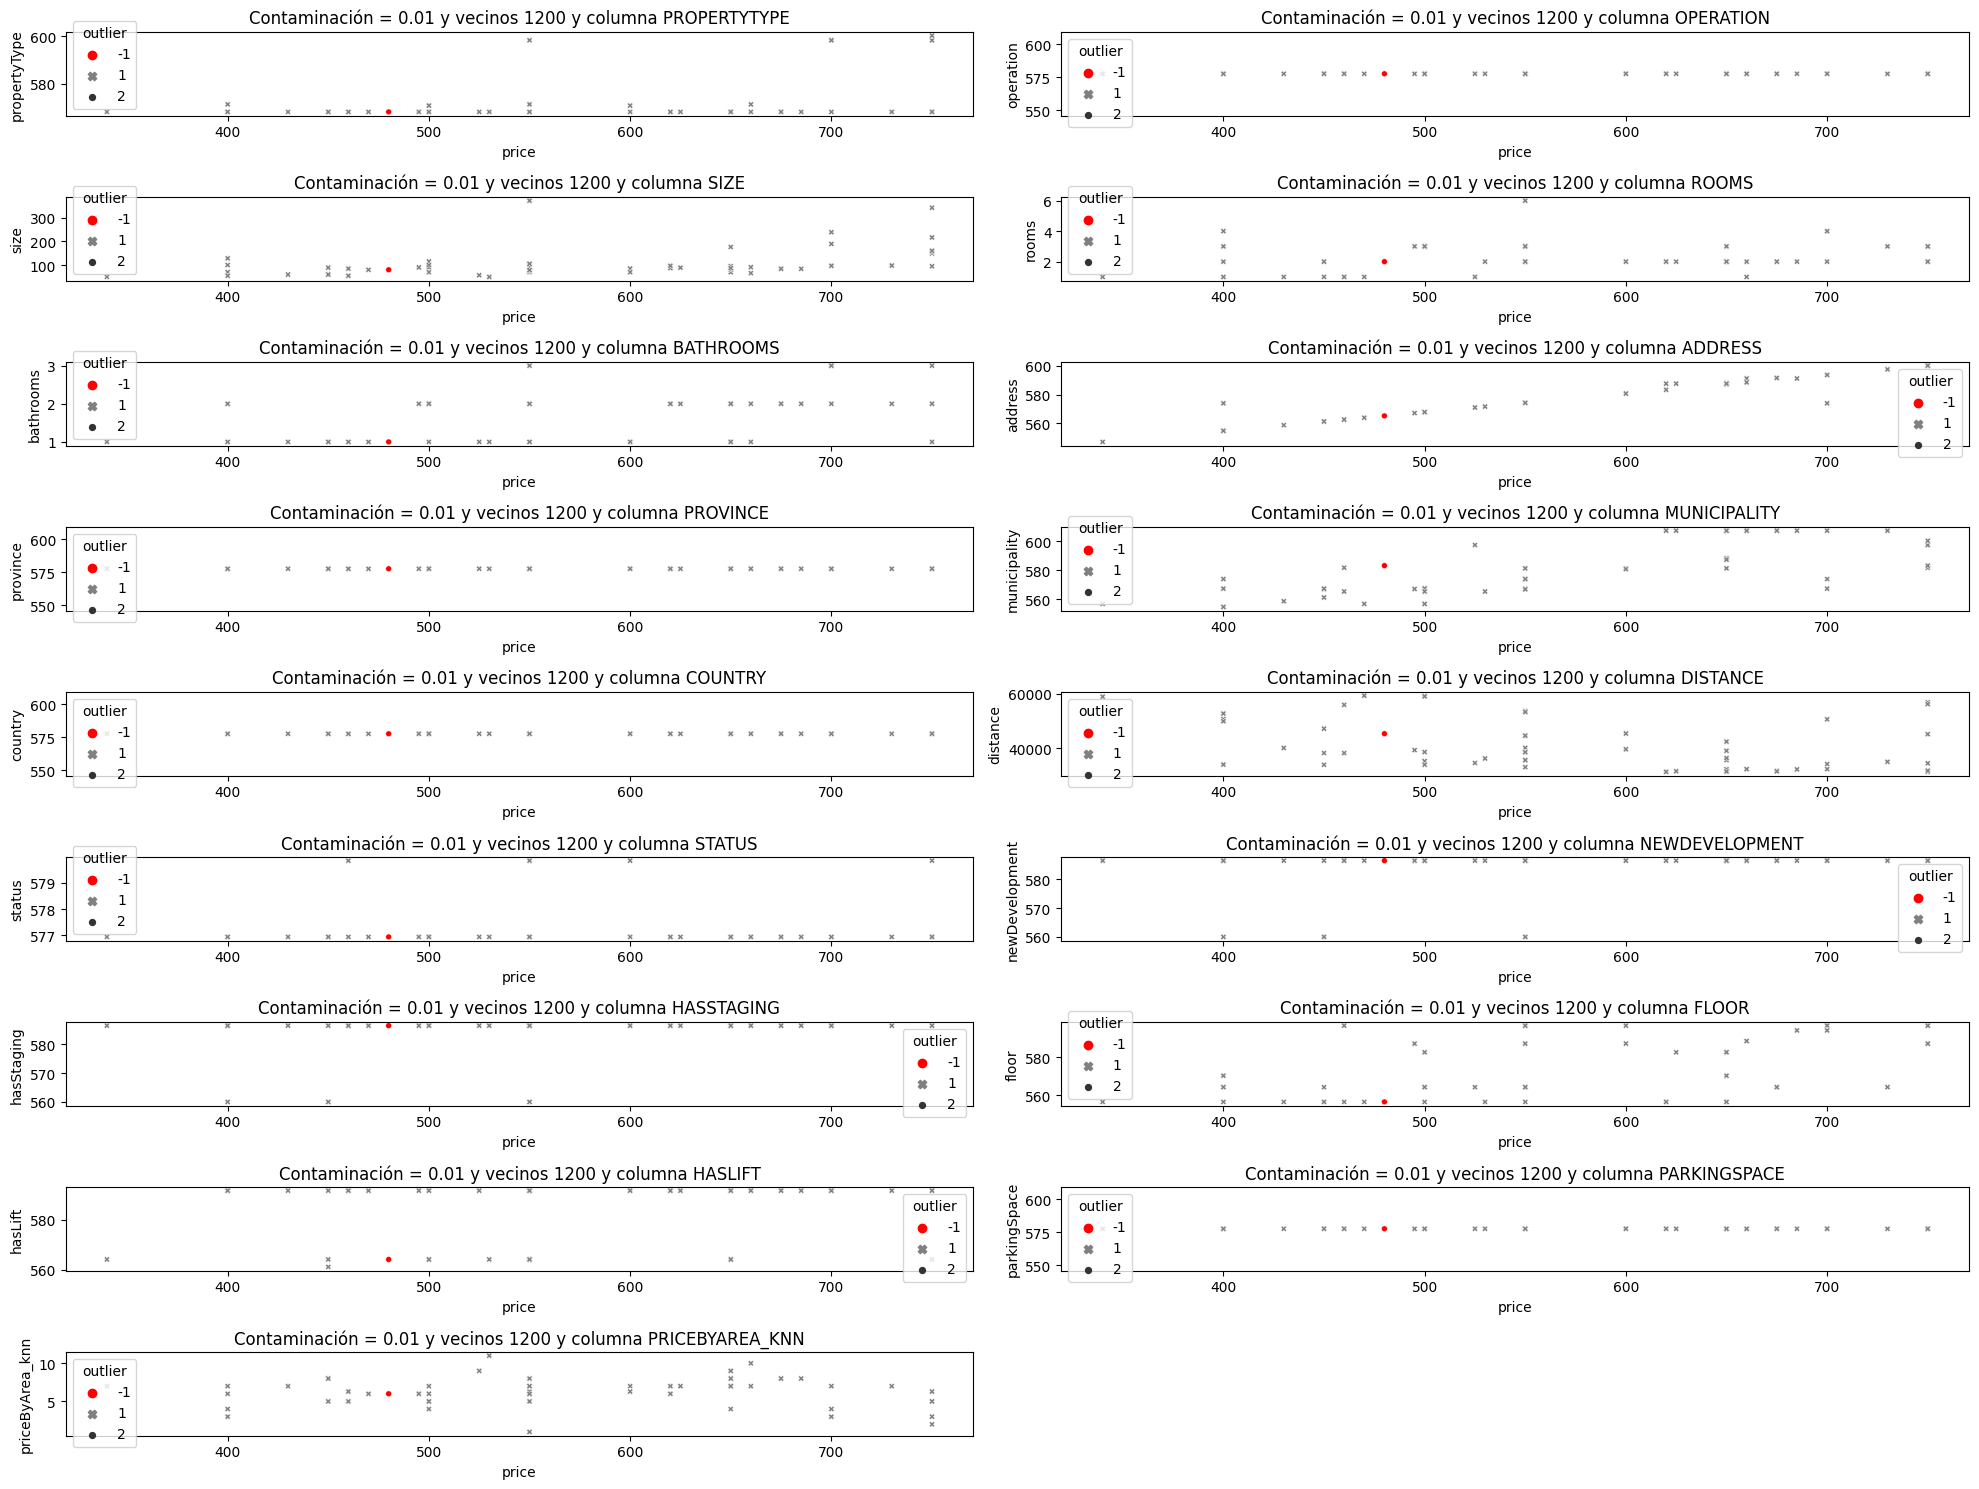

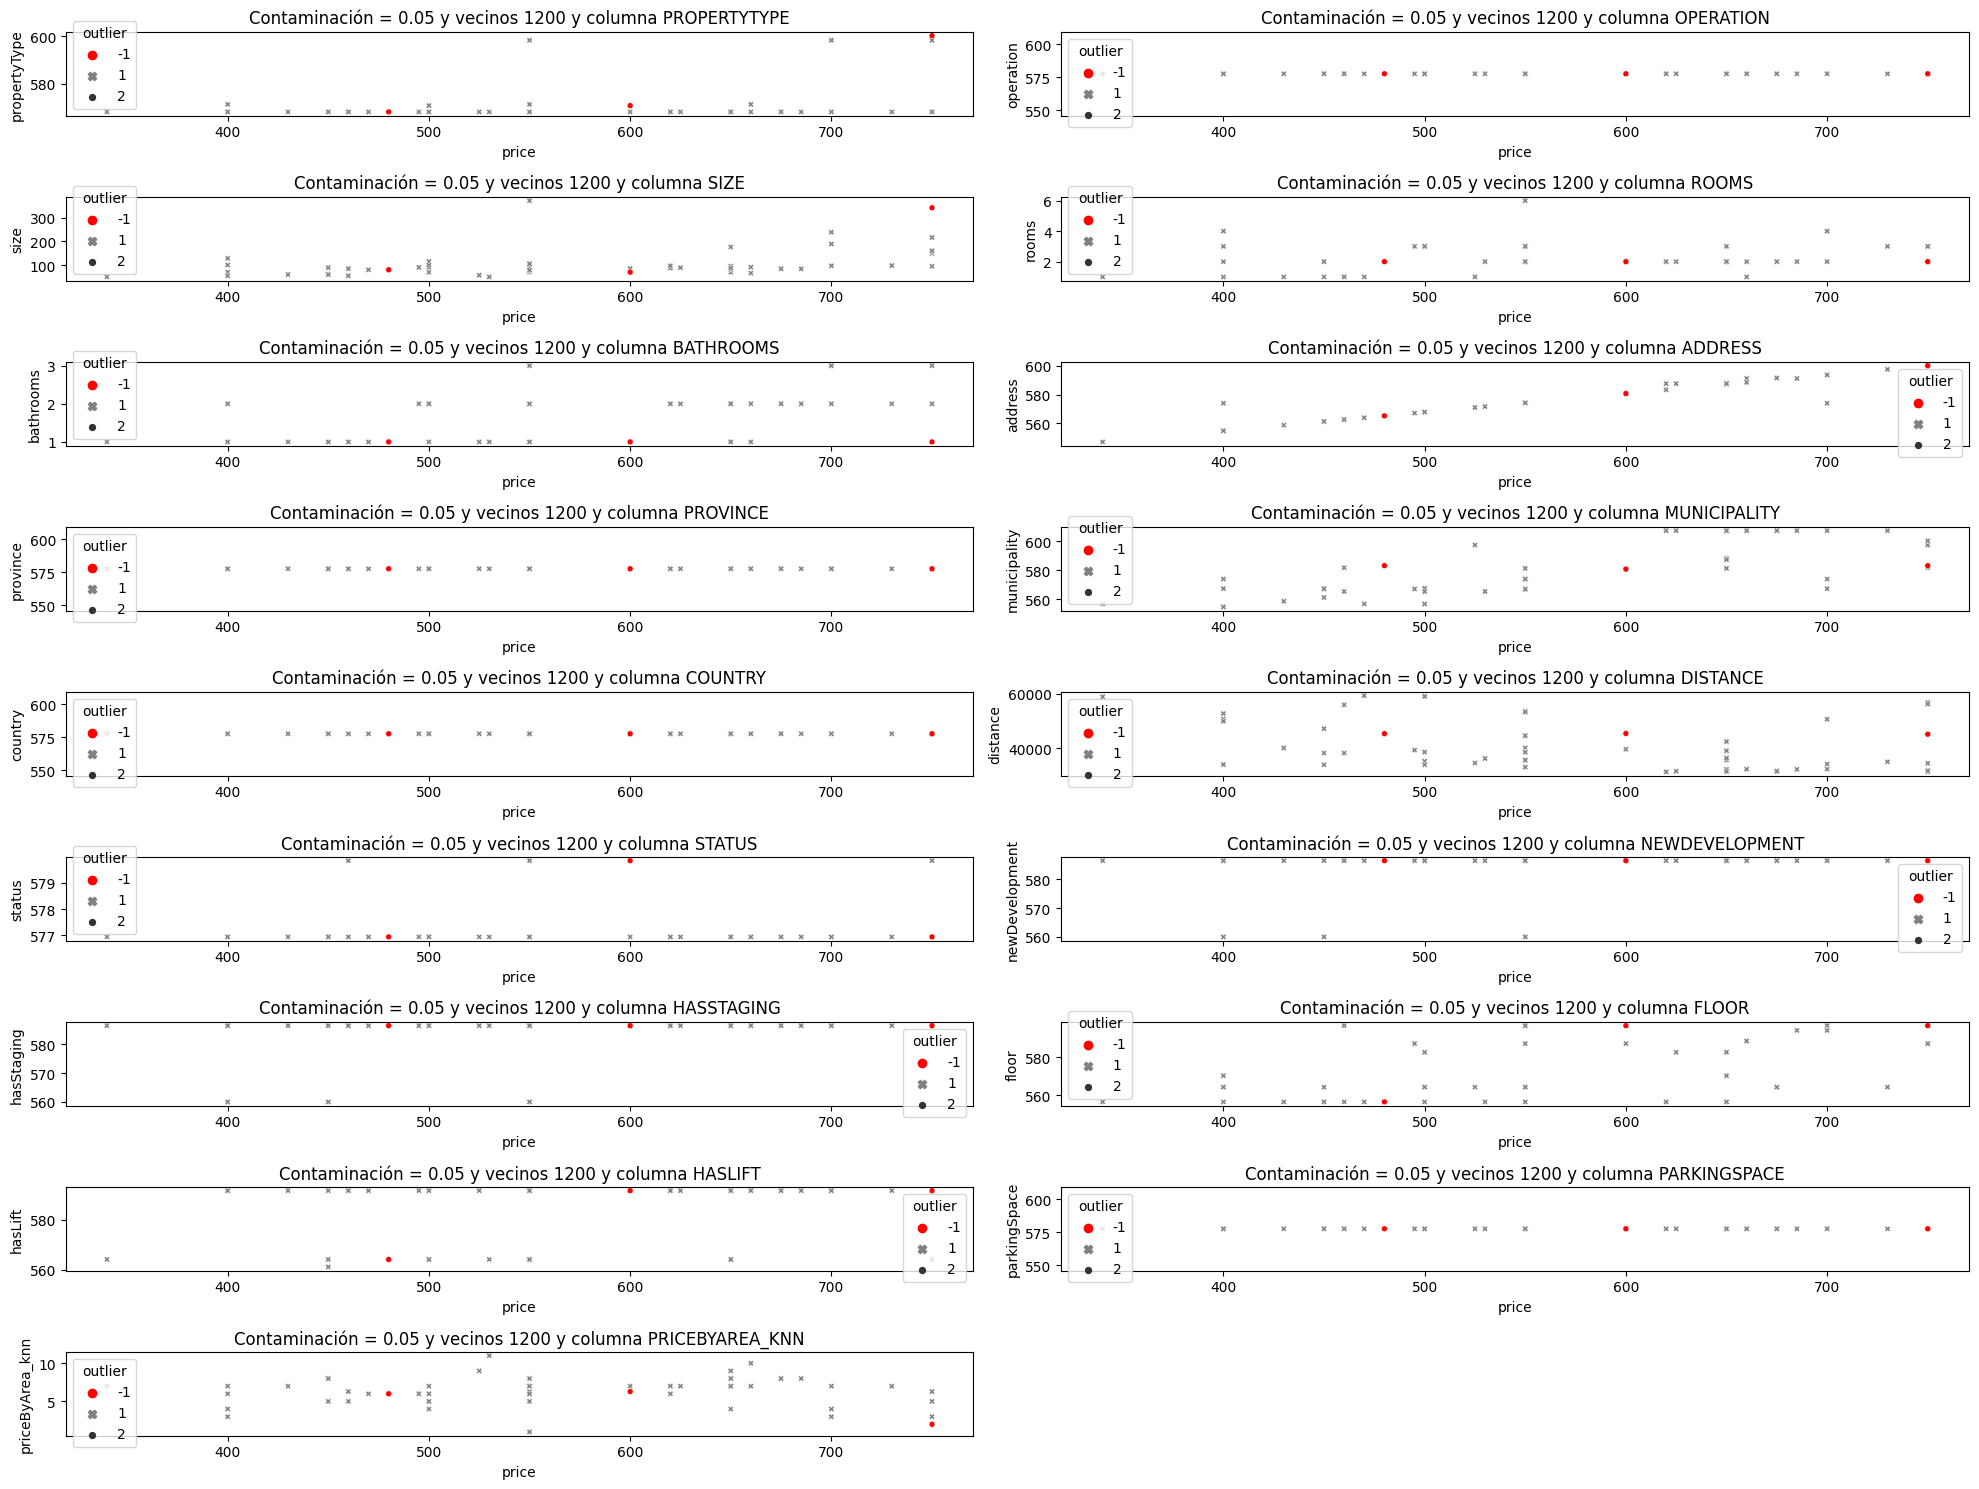

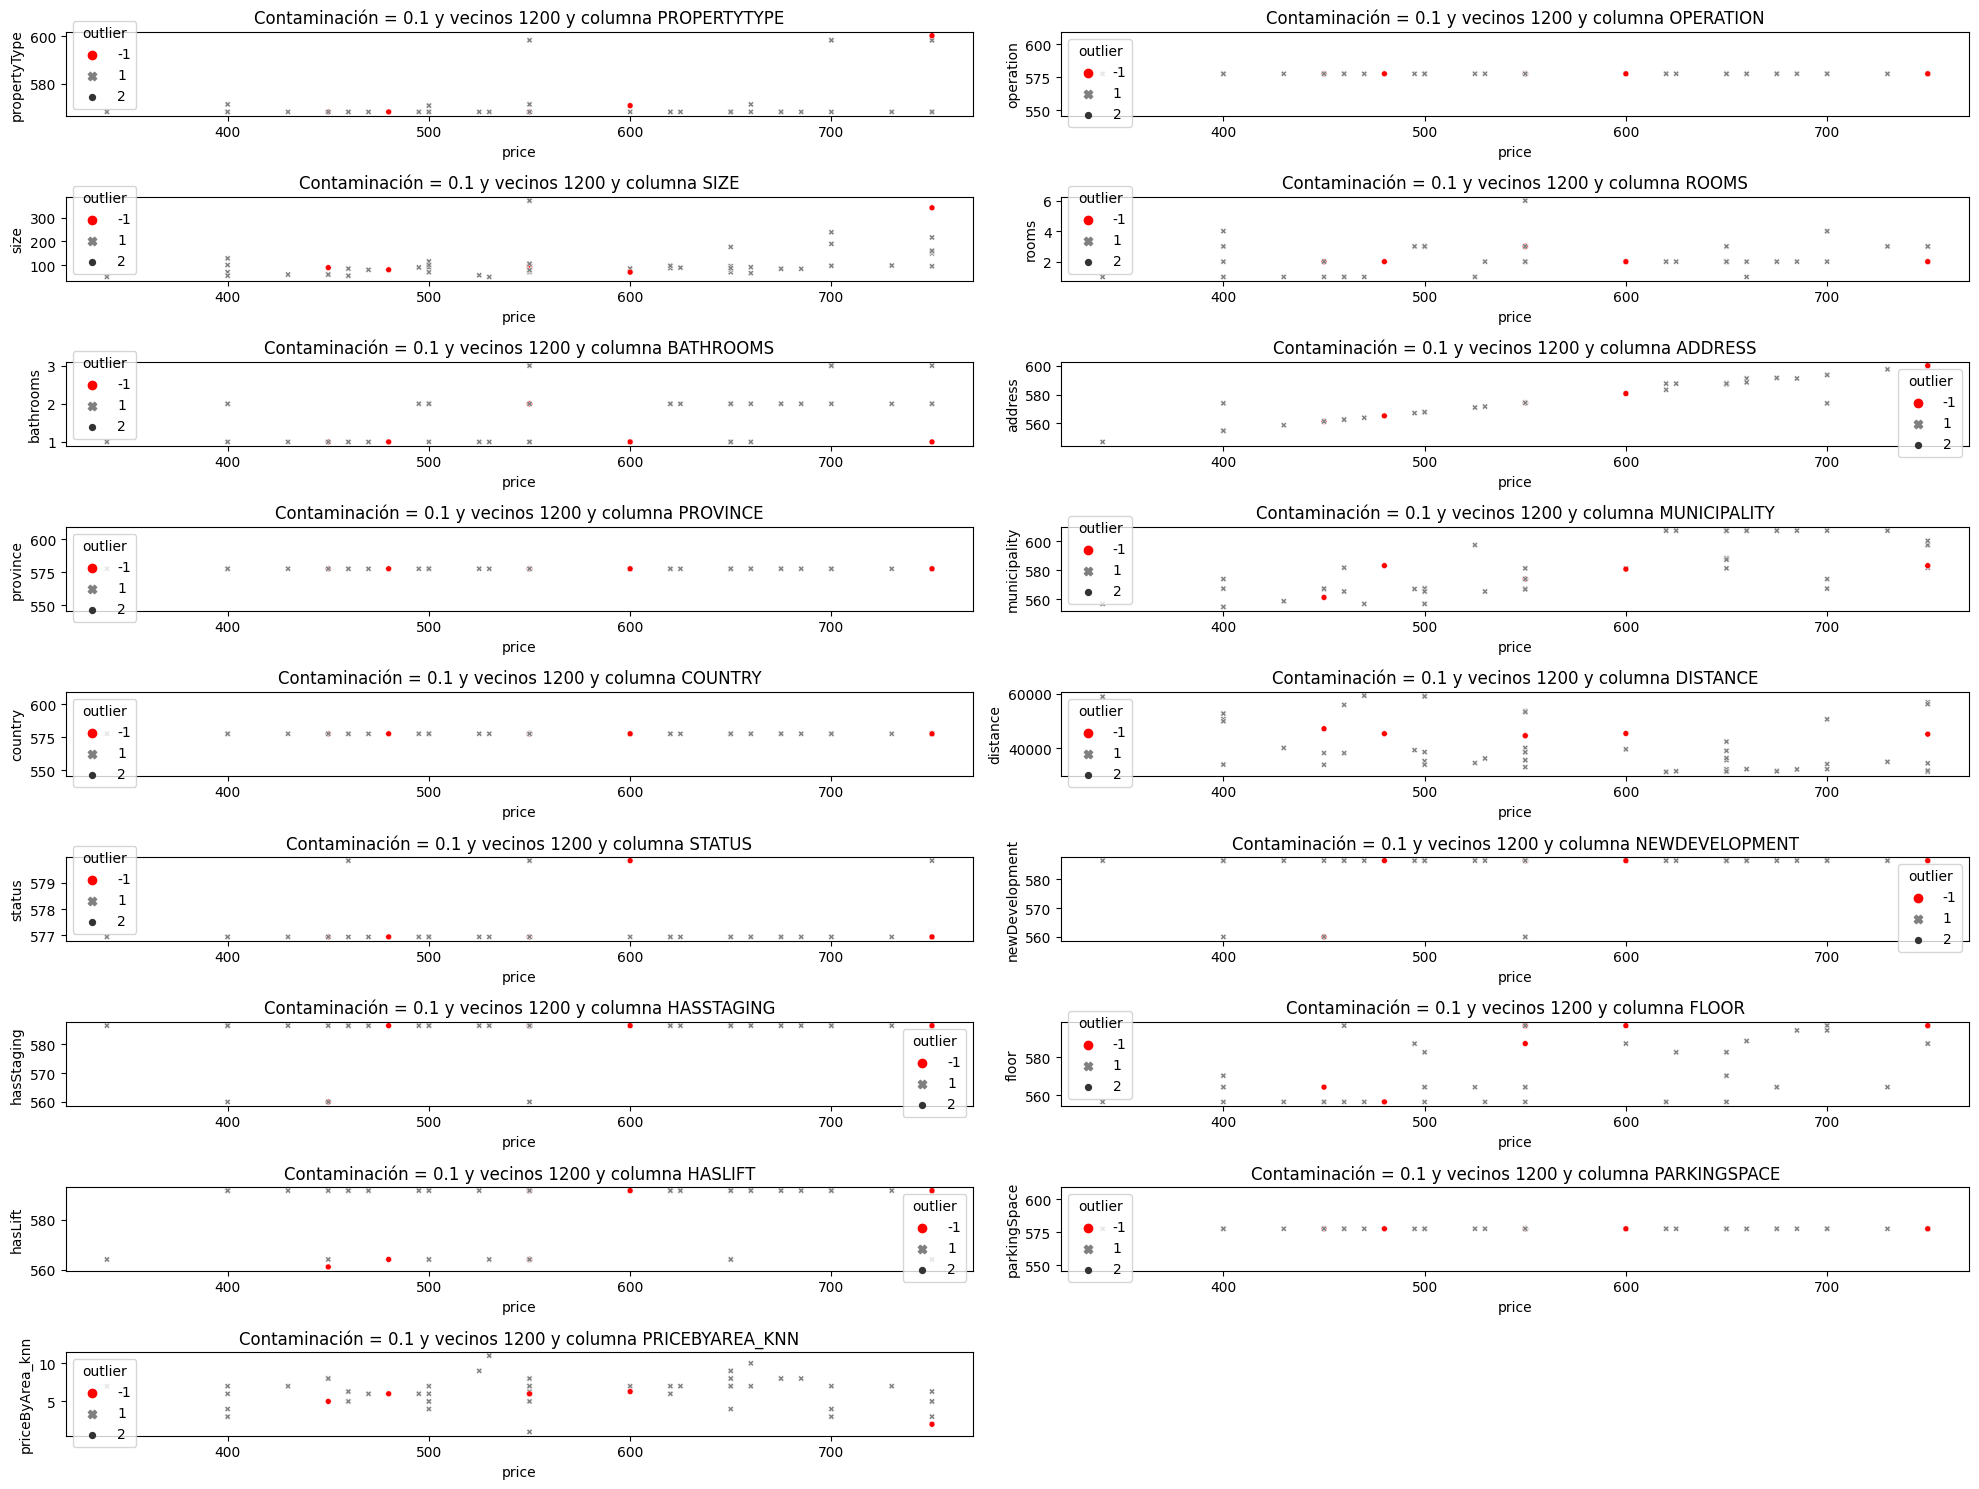

In [29]:
GestorOutliersMultivariados.explorar_outliers_lof("price")

In [30]:
df_filtrado_toledo = GestorOutliersMultivariados.detectar_outliers_if(contaminacion=0.05)

In [31]:
df_filtrado_toledo = GestorOutliersMultivariados.imputar_outliers(data = df_filtrado_toledo, metodo = "mediana")
df_filtrado_toledo.head()

,price,propertyType,operation,size,exterior,rooms,bathrooms,address,province,municipality,country,showAddress,distance,status,newDevelopment,hasStaging,floor,hasLift,parkingSpace,priceByArea_knn
0,550.00,568.30,577.80,87.00,False,2,2,574.18,577.80,580.96,577.80,False,"36,290.50",576.94,586.56,586.56,564.28,591.69,577.80,7.00
1,450.00,568.30,577.80,89.00,False,2,1,561.17,577.80,561.17,577.80,False,"47,186.00",576.94,559.96,559.96,564.28,561.17,577.80,5.00
2,450.00,568.30,577.80,60.00,True,2,1,561.17,577.80,566.76,577.80,False,"38,237.00",576.94,559.96,559.96,556.53,564.15,577.80,8.00
3,550.00,568.30,577.80,90.00,True,3,1,574.18,577.80,573.85,577.80,False,"35,627.00",576.94,559.96,559.96,564.28,564.15,577.80,6.00
4,550.00,568.30,577.80,87.00,True,2,2,574.18,577.80,580.96,577.80,False,"36,290.50",576.94,586.56,586.56,564.28,591.69,577.80,7.00


## Estandarización

In [33]:
df_filtrado_toledo.columns.unique()

Index(['price', 'propertyType', 'operation', 'size', 'exterior', 'rooms',
       'bathrooms', 'address', 'province', 'municipality', 'country',
       'showAddress', 'distance', 'status', 'newDevelopment', 'hasStaging',
       'floor', 'hasLift', 'parkingSpace', 'priceByArea_knn'],
      dtype='object')

In [34]:
escalador_robust = RobustScaler()
datos_transf_robust = escalador_robust.fit_transform(df_filtrado_toledo[['price', 'rooms','bathrooms','priceByArea_knn']])
df_filtrado_toledo[['price_robust', 'rooms_robust','bathrooms_robust','priceByArea_knn_robust']] = datos_transf_robust

escalador_min_max = MinMaxScaler()
datos_transf_min_max = escalador_min_max.fit_transform(df_filtrado_toledo[['price', 'rooms','bathrooms','priceByArea_knn']])
df_filtrado_toledo[["price_min_max", "rooms_min_max", "bathrooms_min_max","priceByArea_knn_min_max"]]  = datos_transf_min_max

escalador_estandar = StandardScaler()
datos_transf_estandar = escalador_estandar.fit_transform(df_filtrado_toledo[['price', 'rooms','bathrooms','priceByArea_knn']])
df_filtrado_toledo[['price_stan', 'rooms_stan','bathrooms_stan','priceByArea_knn_stan']]  = datos_transf_estandar

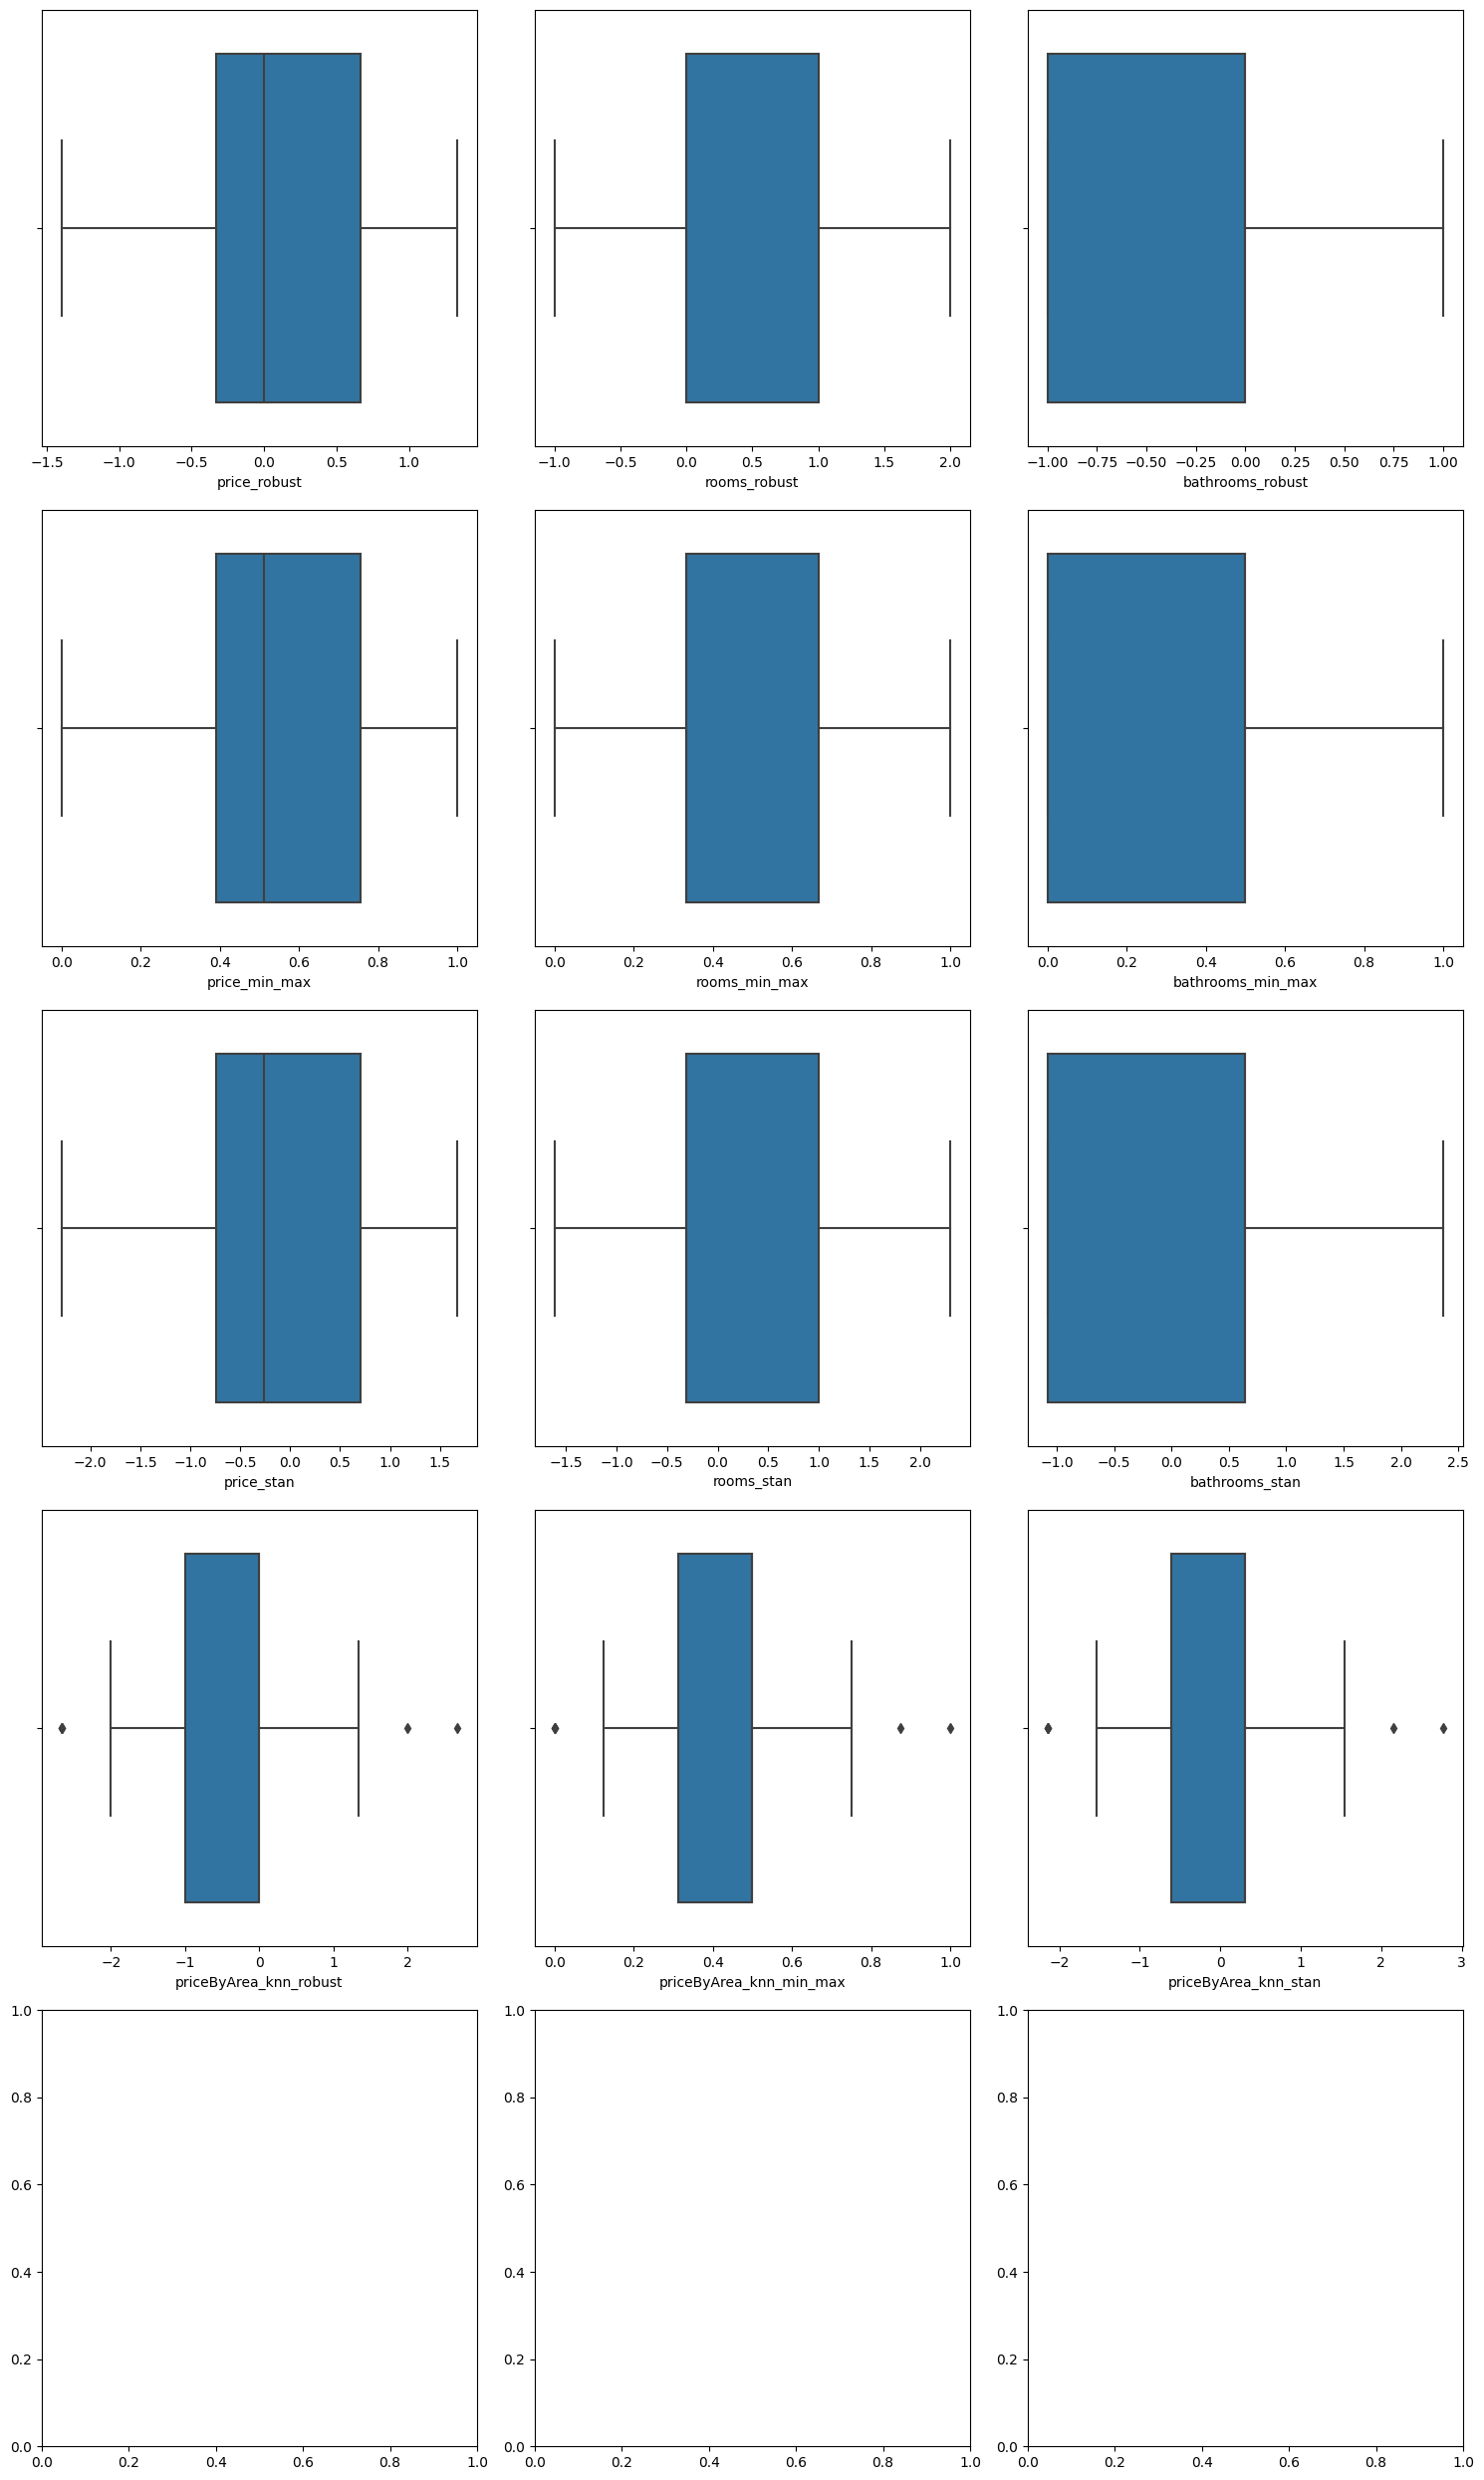

In [35]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 25))

sns.boxplot(x="price_robust", data=df_filtrado_toledo, ax=axes[0][0])
sns.boxplot(x="rooms_robust", data=df_filtrado_toledo, ax=axes[0][1])
sns.boxplot(x="bathrooms_robust", data=df_filtrado_toledo, ax=axes[0][2])

sns.boxplot(x="price_min_max", data=df_filtrado_toledo, ax=axes[1][0])
sns.boxplot(x="rooms_min_max", data=df_filtrado_toledo, ax=axes[1][1])
sns.boxplot(x="bathrooms_min_max", data=df_filtrado_toledo, ax=axes[1][2])

sns.boxplot(x="price_stan", data=df_filtrado_toledo, ax=axes[2][0])
sns.boxplot(x="rooms_stan", data=df_filtrado_toledo, ax=axes[2][1])
sns.boxplot(x="bathrooms_stan", data=df_filtrado_toledo, ax=axes[2][2])

sns.boxplot(x="priceByArea_knn_robust", data=df_filtrado_toledo, ax=axes[3][0])
sns.boxplot(x="priceByArea_knn_min_max", data=df_filtrado_toledo, ax=axes[3][1])
sns.boxplot(x="priceByArea_knn_stan", data=df_filtrado_toledo, ax=axes[3][2])

plt.tight_layout()
plt.show()

In [36]:
escalador_robust

RobustScaler()

In [ ]:
df_filtrado_toledo.drop(columns=['price_min_max', 'rooms_min_max', 'bathrooms_min_max', 'priceByArea_knn_min_max', 
                 'price_stan', 'rooms_stan', 'bathrooms_stan', 'priceByArea_knn_stan'], inplace=True)

In [37]:
df_filtrado_toledo.to_csv("../datos/toledo_preprocesado.csv")